<a href="https://colab.research.google.com/github/hojatollahgholami/AI-in-Oil-and-gas-industry/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arabic_reshaper python-bidi ucimlrepo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 10.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.feature_selection import f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

# تابع نمایش متن فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# بارگیری داده‌ها
df = pd.read_csv('predictive_maintenance.csv')

# انتخاب ویژگی‌ها و هدف
features = df.columns[3:-1]  # حذف ستون‌های شناسه و هدف
X = df[features]
y = df['Machine failure']

# محاسبه اهمیت ویژگی‌ها با سه روش
# 1. روش فیلتر (ANOVA)
f_scores, _ = f_classif(X, y)
filter_scores = MinMaxScaler().fit_transform(f_scores.reshape(-1, 1)).flatten() * 100

# 2. روش رپر (RFE)
estimator = DecisionTreeClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=1, step=1)
selector.fit(X, y)
rfe_ranking = selector.ranking_
wrapper_scores = MinMaxScaler().fit_transform((len(features) - rfe_ranking + 1).reshape(-1, 1)).flatten() * 100

# 3. روش امبدد (جنگل تصادفی)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
embedded_scores = MinMaxScaler().fit_transform(rf.feature_importances_.reshape(-1, 1)).flatten() * 100

# نام‌های فارسی ویژگی‌ها
persian_features = [
    bidi_text('دمای هوا'),
    bidi_text('دمای فرآیند'),
    bidi_text('سرعت چرخش'),
    bidi_text('گشتاور'),
    bidi_text('سایش ابزار'),
    bidi_text('نوع ماشین (L)'),
    bidi_text('نوع ماشین (M)'),
    bidi_text('نوع ماشین (H)')
]

# ایجاد نمودار مقایسه‌ای
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12

x = np.arange(len(persian_features))
width = 0.25

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, filter_scores, width, label=bidi_text('فیلتر (ANOVA)'), color='#1f77b4')
rects2 = ax.bar(x, wrapper_scores, width, label=bidi_text('رپر (RFE)'), color='#ff7f0e')
rects3 = ax.bar(x + width, embedded_scores, width, label=bidi_text('امبدد (جنگل تصادفی)'), color='#2ca02c')

# تنظیمات نمودار
ax.set_title(bidi_text('مقایسه اهمیت ویژگی‌ها در پیش‌بینی خرابی ماشین‌آلات صنعتی'), fontsize=16, pad=20)
ax.set_xlabel(bidi_text('ویژگی‌ها'), fontsize=14)
ax.set_ylabel(bidi_text('اهمیت نسبی (%)'), fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(persian_features, fontsize=12)
ax.legend(loc='upper right', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# نمایش مقادیر روی میله‌ها
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# توضیحات پایین نمودار
plt.figtext(0.5, 0.01,
            bidi_text('منبع داده‌ها: دیتاست Predictive Maintenance of Machines از کاگل | تحلیل بر اساس سه روش انتخاب ویژگی'),
            ha="center", fontsize=11,
            bbox={"facecolor":"lightgray", "alpha":0.3, "pad":5})

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig('feature_importance_comparison.png', dpi=300)
plt.show()

/tmp/ipython-input-6-1961386559.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'زمان': pd.date_range(start='2023-01-01', periods=n_samples, freq='H'),


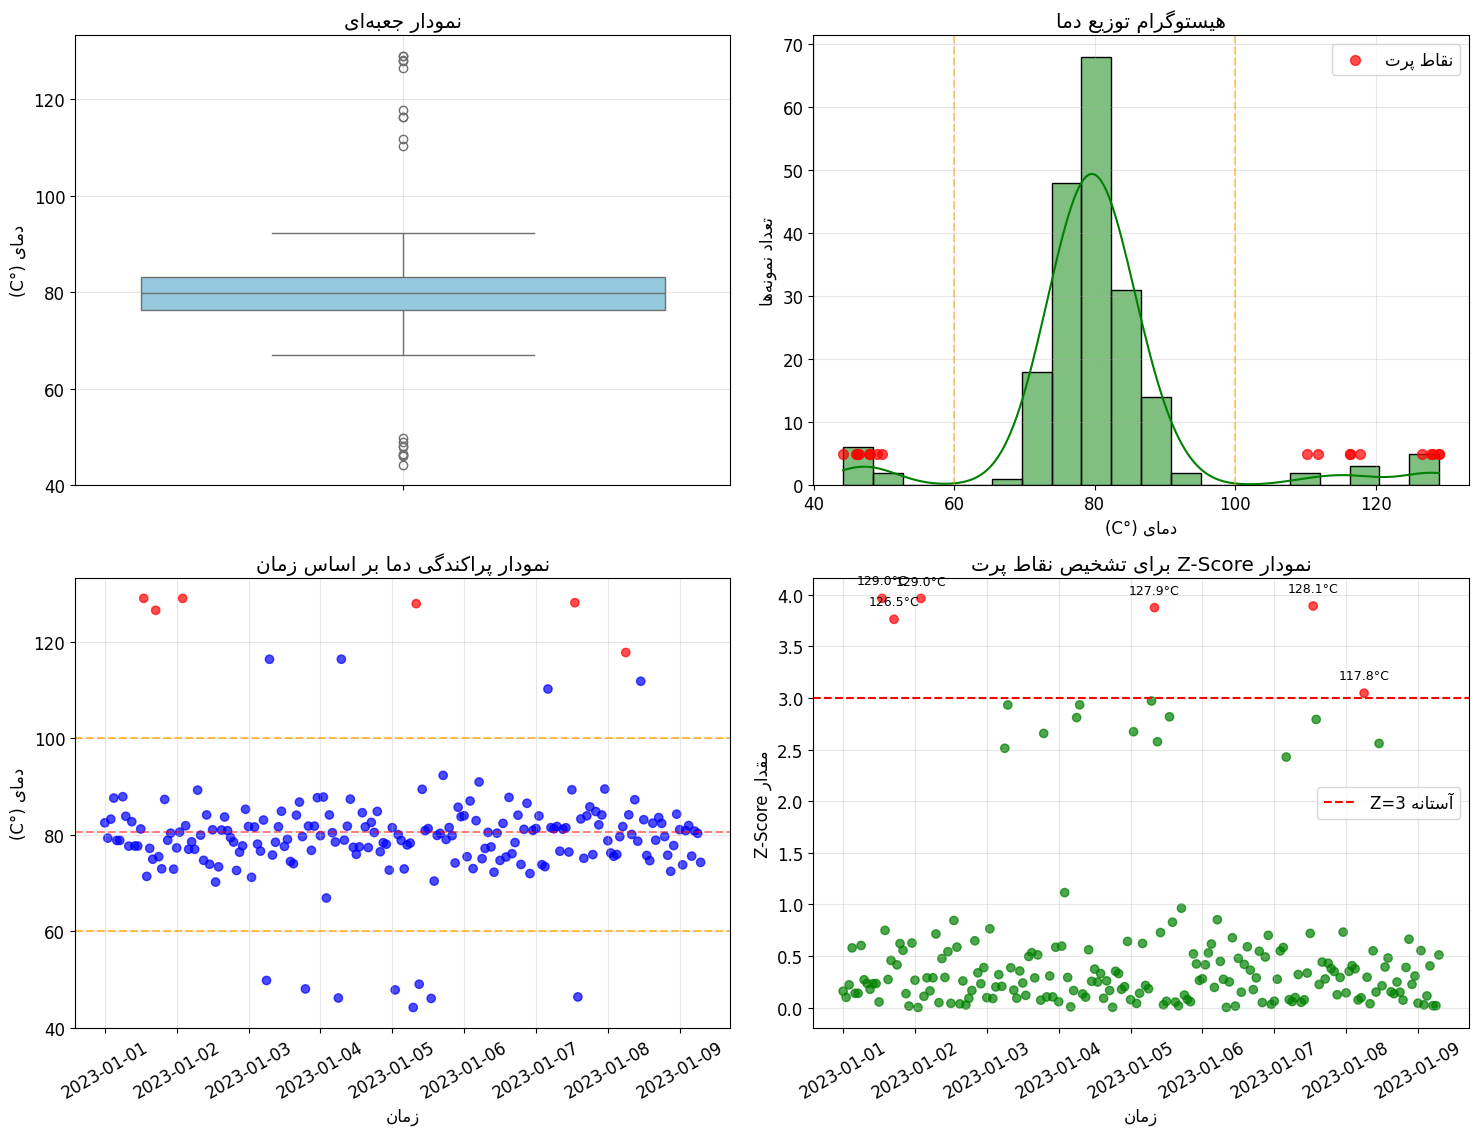

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib as mpl

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

# ایجاد داده‌های مصنوعی برای دمای برج تقطیر
n_samples = 200
base_temp = np.random.normal(80, 5, n_samples)  # دمای پایه حول 80 درجه

# افزودن نقاط پرت (outliers)
outlier_indices = np.random.choice(n_samples, size=10, replace=False)
base_temp[outlier_indices] = np.random.uniform(110, 130, 10)  # نقاط پرت با دمای بالا
outlier_indices = np.random.choice(n_samples, size=8, replace=False)
base_temp[outlier_indices] = np.random.uniform(40, 50, 8)  # نقاط پرت با دمای پایین

# ایجاد دیتافریم
df = pd.DataFrame({
    'زمان': pd.date_range(start='2023-01-01', periods=n_samples, freq='H'),
    'دما': base_temp
})

# محاسبه Z-Score
df['Z-Score'] = np.abs(stats.zscore(df['دما']))

# ایجاد نمودارها در یک گرید 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
#fig.suptitle(bidi_text('تحلیل داده‌های حسگر دمای برج تقطیر'),
 #            fontsize=16, fontweight='bold')

# 1. نمودار جعبه‌ای
sns.boxplot(y=df['دما'], ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title(bidi_text('نمودار جعبه‌ای'))
axs[0, 0].set_ylabel(bidi_text('دمای (°C)'))
axs[0, 0].grid(alpha=0.3)

# افزودن میانگین به نمودار
mean_temp = np.mean(df['دما'])
#axs[0, 0].axhline(y=mean_temp, color='red', linestyle='--', alpha=0.7,
 #                 label=bidi_text(f'میانگین: {mean_temp:.1f}°C'))
#axs[0, 0].legend()

# 2. هیستوگرام (Histogram)
sns.histplot(df['دما'], bins=20, kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title(bidi_text('هیستوگرام توزیع دما'))
axs[0, 1].set_xlabel(bidi_text('دمای (°C)'))
axs[0, 1].set_ylabel(bidi_text('تعداد نمونه‌ها'))
axs[0, 1].grid(alpha=0.3)

# نشان دادن نقاط پرت در هیستوگرام
lower_outliers = df[df['دما'] < 60]
upper_outliers = df[df['دما'] > 100]
axs[0, 1].scatter(lower_outliers['دما'], [5]*len(lower_outliers),
                 color='red', s=50, alpha=0.7, label=bidi_text('نقاط پرت'))
axs[0, 1].scatter(upper_outliers['دما'], [5]*len(upper_outliers),
                 color='red', s=50, alpha=0.7)
axs[0, 1].axvline(x=60, color='orange', linestyle='--', alpha=0.5)
axs[0, 1].axvline(x=100, color='orange', linestyle='--', alpha=0.5)
axs[0, 1].legend()

# 3. نمودار پراکندگی (Scatter Plot)
axs[1, 0].scatter(df['زمان'], df['دما'], alpha=0.7,
                 c=np.where(df['Z-Score'] > 3, 'red', 'blue'))
axs[1, 0].set_title(bidi_text('نمودار پراکندگی دما بر اساس زمان'))
axs[1, 0].set_xlabel(bidi_text('زمان'))
axs[1, 0].set_ylabel(bidi_text('دمای (°C)'))
axs[1, 0].tick_params(axis='x', rotation=30)
axs[1, 0].grid(alpha=0.3)
axs[1, 0].axhline(y=mean_temp, color='red', linestyle='--', alpha=0.5)

# افزودن خطوط هشدار
axs[1, 0].axhline(y=100, color='orange', linestyle='--', alpha=0.7)
axs[1, 0].axhline(y=60, color='orange', linestyle='--', alpha=0.7)

# 4. نمودار Z-Score
axs[1, 1].scatter(df['زمان'], df['Z-Score'], alpha=0.7,
                 c=np.where(df['Z-Score'] > 3, 'red', 'green'))
axs[1, 1].set_title(bidi_text('نمودار Z-Score برای تشخیص نقاط پرت'))
axs[1, 1].set_xlabel(bidi_text('زمان'))
axs[1, 1].set_ylabel(bidi_text('مقدار Z-Score'))
axs[1, 1].tick_params(axis='x', rotation=30)
axs[1, 1].grid(alpha=0.3)
axs[1, 1].axhline(y=3, color='red', linestyle='--',
                  label=bidi_text('آستانه Z=3'))
axs[1, 1].legend()

# افزودن توضیحات به نمودار Z-Score
for i in df[df['Z-Score'] > 3].index:
    axs[1, 1].annotate(bidi_text(f"{df.loc[i, 'دما']:.1f}°C"),
                      (df.loc[i, 'زمان'], df.loc[i, 'Z-Score']),
                      textcoords="offset points",
                      xytext=(0,10),
                      ha='center',
                      fontsize=9)

# تنظیم فاصله‌گذاری
plt.tight_layout(rect=[0, 0, 1, 0.96])  # ایجاد فضای کافی برای عنوان اصلی
plt.show()

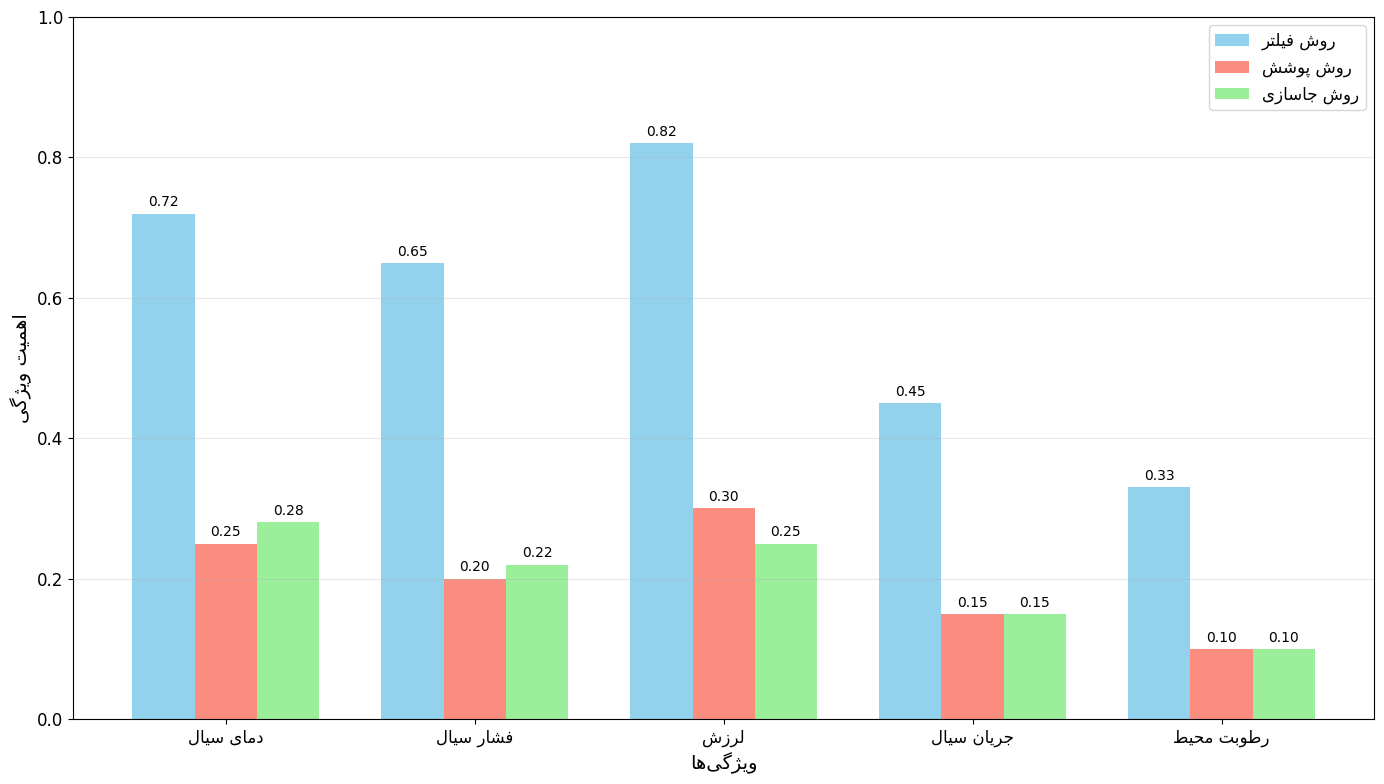

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# داده‌های ورودی
features = ['دمای سیال','فشار سیال','لرزش','جریان سیال','رطوبت محیط']
corr = [0.72, 0.65, 0.82, 0.45, 0.33]
wrapper = [0.25, 0.20, 0.30, 0.15, 0.10]
embedded = [0.28, 0.22, 0.25, 0.15, 0.10]

# تبدیل نام ویژگی‌ها به فارسی صحیح
persian_features = [bidi_text(feature) for feature in features]

# تنظیمات نمودار
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
plt.figure(figsize=(14, 8))

# موقعیت‌های میله‌ها روی محور X
x = np.arange(len(persian_features))
width = 0.25

# ایجاد میله‌ها برای هر روش
rects1 = plt.bar(x - width, corr, width, label=bidi_text('روش فیلتر'), color='skyblue', alpha=0.9)
rects2 = plt.bar(x, wrapper, width, label=bidi_text('روش پوشش'), color='salmon', alpha=0.9)
rects3 = plt.bar(x + width, embedded, width, label=bidi_text('روش جاسازی'), color='lightgreen', alpha=0.9)

# تنظیم عنوان و برچسب‌ها
#plt.title(bidi_text('مقایسه اهمیت ویژگی‌ها در سه روش انتخاب ویژگی'), fontsize=16)
plt.xlabel(bidi_text('ویژگی‌ها'), fontsize=14)
plt.ylabel(bidi_text('اهمیت ویژگی'), fontsize=14)
plt.xticks(x, persian_features, fontsize=12)
plt.legend(fontsize=12)

# افزودن مقادیر عددی روی میله‌ها
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # فاصله 3 نقطه‌ای از بالای میله
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# افزودن خطوط راهنما و گرید
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1.0)  # محدوده محور Y از 0 تا 1

# افزودن توضیحات پایین نمودار
#plt.figtext(0.5, 0.01,
#           bidi_text('تحلیل اهمیت ویژگی‌ها در روش‌های مختلف انتخاب ویژگی برای داده‌های صنعتی'),
#           ha="center", fontsize=11,
#           bbox={"facecolor":"lightgray", "alpha":0.3, "pad":5})

plt.tight_layout()
plt.show()

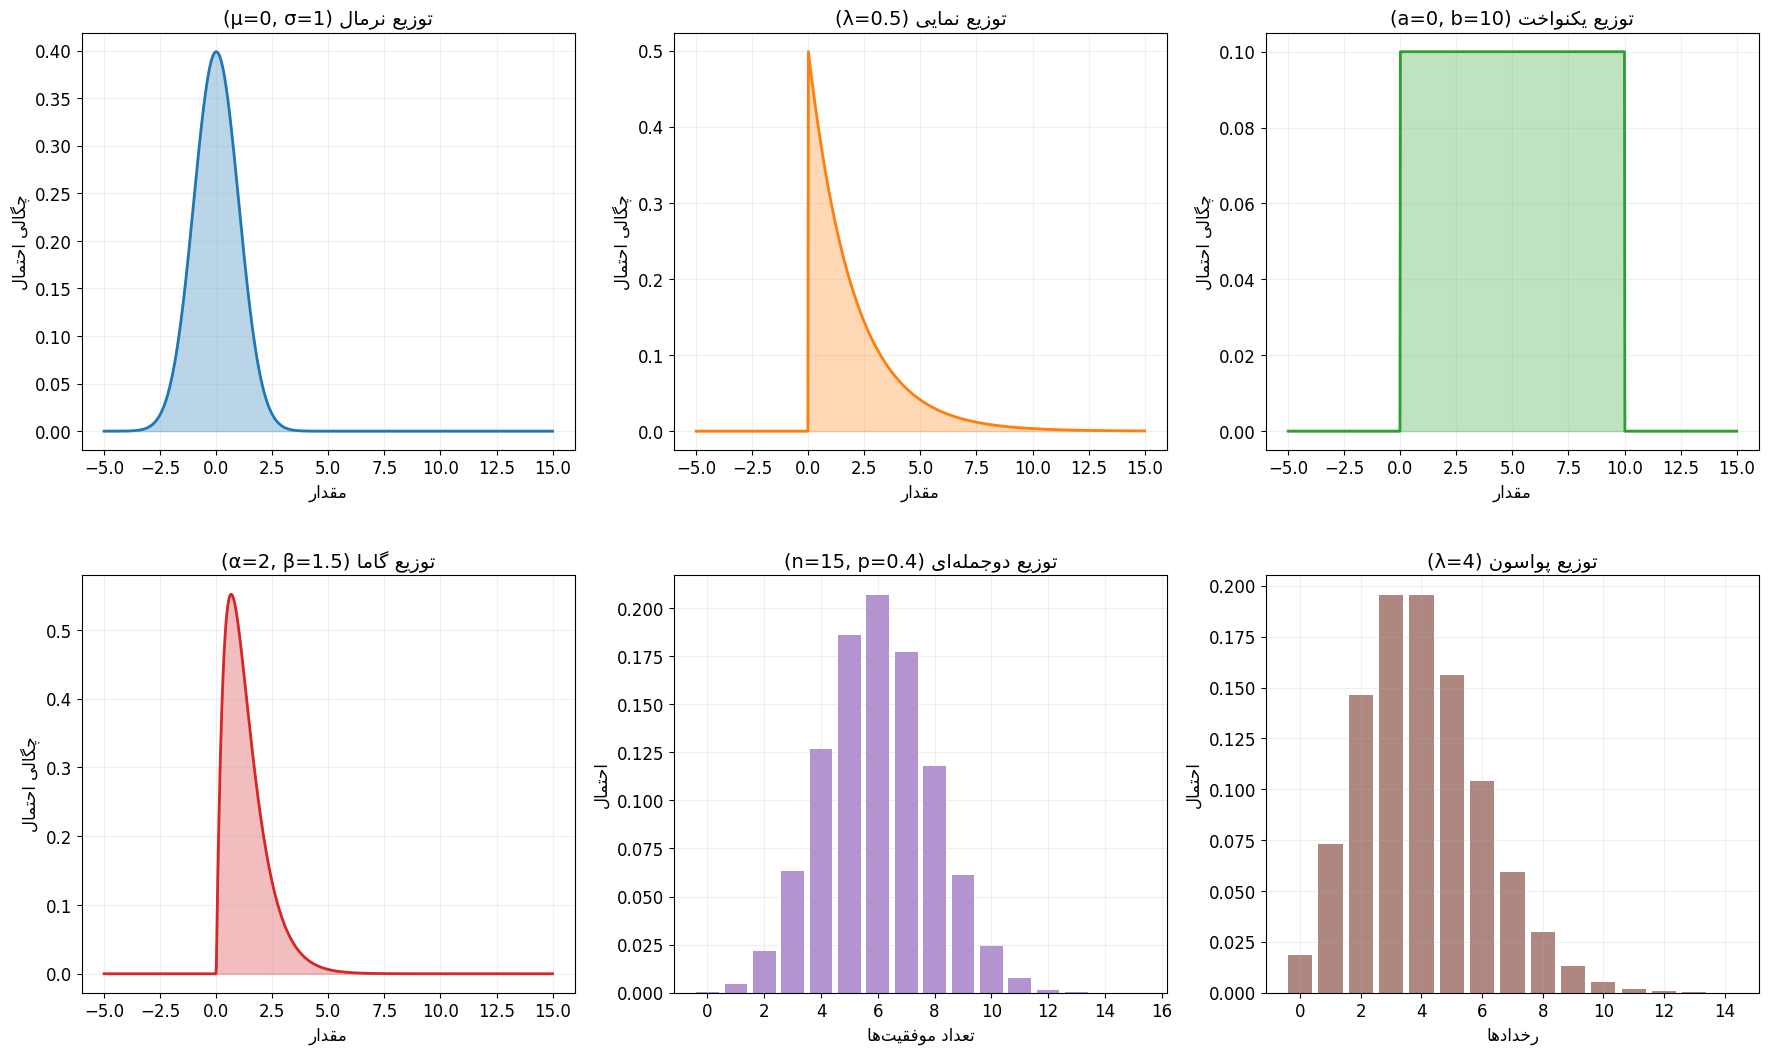

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from scipy.stats import norm, expon, uniform, gamma, binom, poisson

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
#fig.suptitle(bidi_text('انواع توزیع‌های آماری پرکاربرد'), fontsize=20, fontweight='bold')

# تنظیمات مشترک برای همه نمودارها
x = np.linspace(-5, 15, 1000)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# 1. توزیع نرمال
mu, sigma = 0, 1
axs[0, 0].plot(x, norm.pdf(x, mu, sigma), color=colors[0], linewidth=2)
axs[0, 0].fill_between(x, norm.pdf(x, mu, sigma), color=colors[0], alpha=0.3)
axs[0, 0].set_title(bidi_text('توزیع نرمال (μ=0, σ=1)'), fontsize=14)
axs[0, 0].set_xlabel(bidi_text('مقدار'), fontsize=12)
axs[0, 0].set_ylabel(bidi_text('چگالی احتمال'), fontsize=12)
axs[0, 0].grid(alpha=0.2)

# 2. توزیع نمایی
lambda_param = 0.5
axs[0, 1].plot(x, expon.pdf(x, scale=1/lambda_param), color=colors[1], linewidth=2)
axs[0, 1].fill_between(x, expon.pdf(x, scale=1/lambda_param), color=colors[1], alpha=0.3)
axs[0, 1].set_title(bidi_text('توزیع نمایی (λ=0.5)'), fontsize=14)
axs[0, 1].set_xlabel(bidi_text('مقدار'), fontsize=12)
axs[0, 1].set_ylabel(bidi_text('چگالی احتمال'), fontsize=12)
axs[0, 1].grid(alpha=0.2)

# 3. توزیع یکنواخت
a, b = 0, 10
axs[0, 2].plot(x, uniform.pdf(x, a, b-a), color=colors[2], linewidth=2)
axs[0, 2].fill_between(x, uniform.pdf(x, a, b-a), color=colors[2], alpha=0.3)
axs[0, 2].set_title(bidi_text('توزیع یکنواخت (a=0, b=10)'), fontsize=14)
axs[0, 2].set_xlabel(bidi_text('مقدار'), fontsize=12)
axs[0, 2].set_ylabel(bidi_text('چگالی احتمال'), fontsize=12)
axs[0, 2].grid(alpha=0.2)

# 4. توزیع گاما
alpha, beta = 2, 1.5
axs[1, 0].plot(x, gamma.pdf(x, alpha, scale=1/beta), color=colors[3], linewidth=2)
axs[1, 0].fill_between(x, gamma.pdf(x, alpha, scale=1/beta), color=colors[3], alpha=0.3)
axs[1, 0].set_title(bidi_text('توزیع گاما (α=2, β=1.5)'), fontsize=14)
axs[1, 0].set_xlabel(bidi_text('مقدار'), fontsize=12)
axs[1, 0].set_ylabel(bidi_text('چگالی احتمال'), fontsize=12)
axs[1, 0].grid(alpha=0.2)

# 5. توزیع دوجمله‌ای
n, p = 15, 0.4
x_binom = np.arange(0, n+1)
axs[1, 1].bar(x_binom, binom.pmf(x_binom, n, p), color=colors[4], alpha=0.7)
axs[1, 1].set_title(bidi_text('توزیع دوجمله‌ای (n=15, p=0.4)'), fontsize=14)
axs[1, 1].set_xlabel(bidi_text('تعداد موفقیت‌ها'), fontsize=12)
axs[1, 1].set_ylabel(bidi_text('احتمال'), fontsize=12)
axs[1, 1].grid(alpha=0.2)

# 6. توزیع پواسون
mu_poisson = 4
x_poisson = np.arange(0, 15)
axs[1, 2].bar(x_poisson, poisson.pmf(x_poisson, mu_poisson), color=colors[5], alpha=0.7)
axs[1, 2].set_title(bidi_text('توزیع پواسون (λ=4)'), fontsize=14)
axs[1, 2].set_xlabel(bidi_text('رخدادها'), fontsize=12)
axs[1, 2].set_ylabel(bidi_text('احتمال'), fontsize=12)
axs[1, 2].grid(alpha=0.2)

# توضیحات پایین صفحه
#plt.figtext(0.5, 0.01,
#           bidi_text('توزیع‌های آماری پرکاربرد در تحلیل داده‌های صنعتی و علمی | ترسیم شده با Python'),
 #          ha="center", fontsize=14,
  #         bbox={"facecolor":"lightgray", "alpha":0.3, "pad":10})

# تنظیم فاصله‌ها
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.3, wspace=0.2)
plt.show()

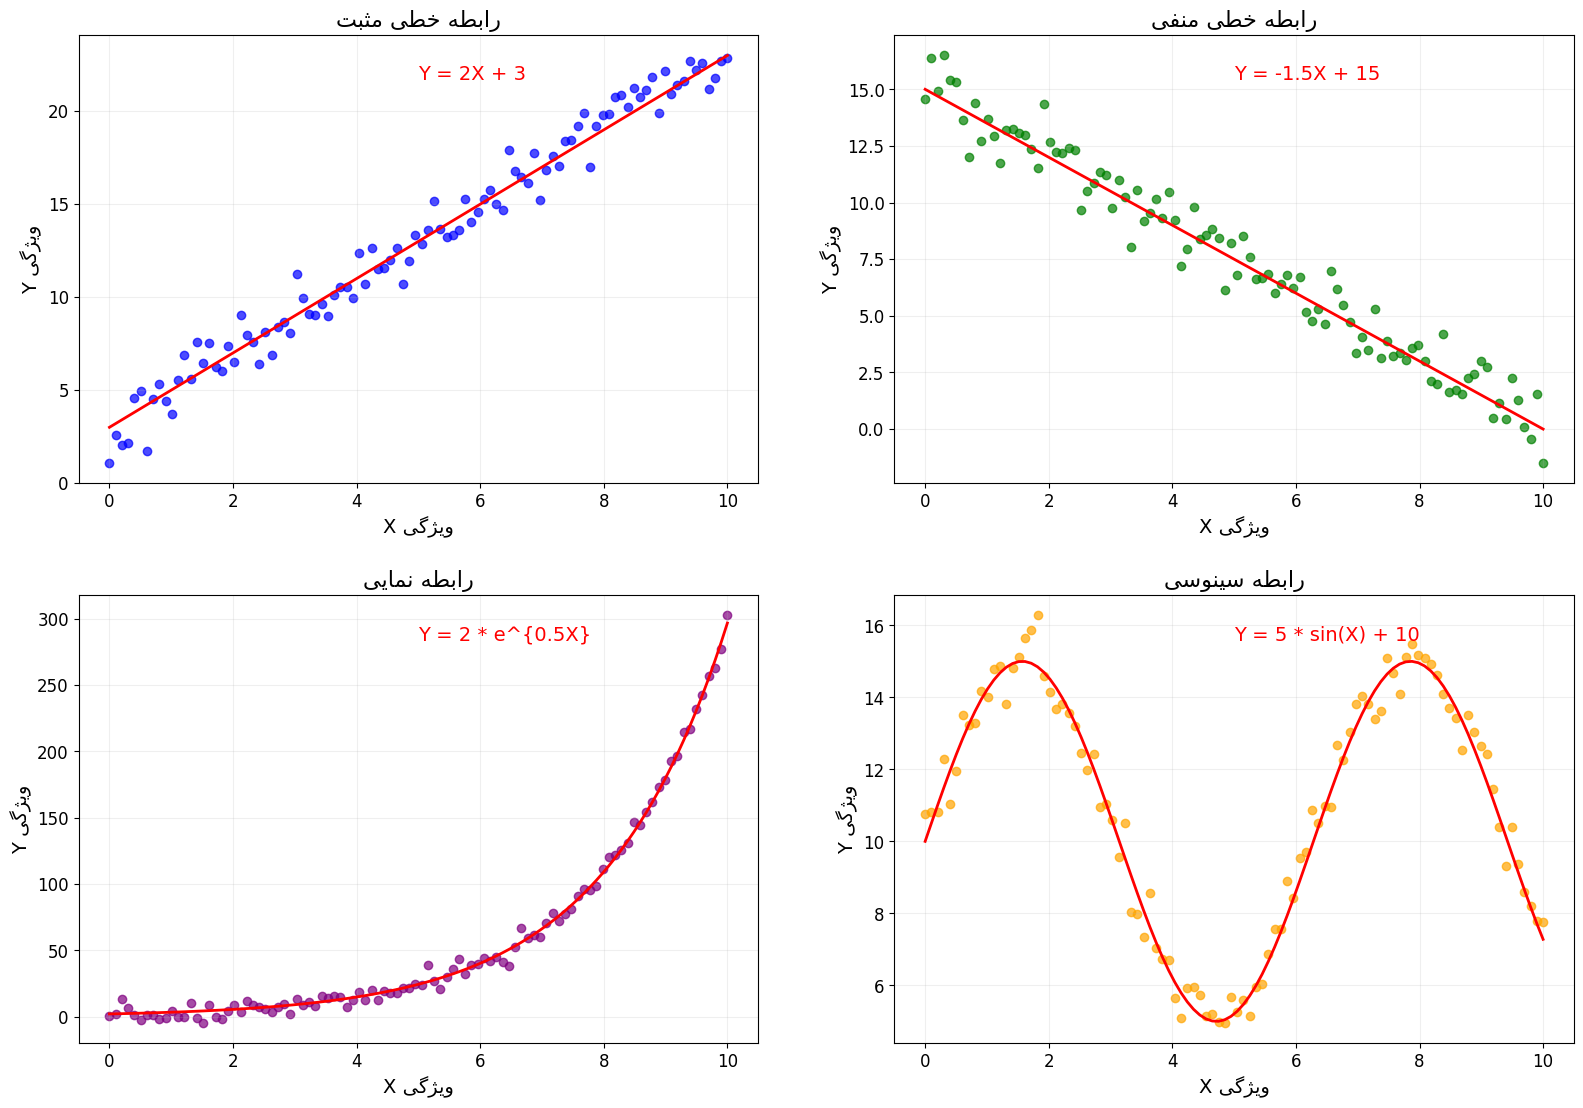

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib as mpl

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False  # حل مشکل نمایش علامت منفی
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
#fig.suptitle(bidi_text('مقایسه انواع روابط بین دو ویژگی'), fontsize=20, fontweight='bold')

# تولید داده‌ها
x = np.linspace(0, 10, 100)

# 1. رابطه خطی مثبت
y_linear_positive = 2 * x + 3 + np.random.normal(0, 1, len(x))
axs[0, 0].scatter(x, y_linear_positive, color='blue', alpha=0.7)
axs[0, 0].plot(x, 2*x + 3, 'r-', linewidth=2)
axs[0, 0].set_title(bidi_text('رابطه خطی مثبت'), fontsize=16)
axs[0, 0].set_xlabel(bidi_text('ویژگی X'), fontsize=14)
axs[0, 0].set_ylabel(bidi_text('ویژگی Y'), fontsize=14)
axs[0, 0].grid(alpha=0.2)
axs[0, 0].annotate(bidi_text('Y = 2X + 3'), xy=(0.5, 0.9),
                  xycoords='axes fraction', fontsize=14, color='red')

# 2. رابطه خطی منفی
y_linear_negative = -1.5 * x + 15 + np.random.normal(0, 1, len(x))
axs[0, 1].scatter(x, y_linear_negative, color='green', alpha=0.7)
axs[0, 1].plot(x, -1.5*x + 15, 'r-', linewidth=2)
axs[0, 1].set_title(bidi_text('رابطه خطی منفی'), fontsize=16)
axs[0, 1].set_xlabel(bidi_text('ویژگی X'), fontsize=14)
axs[0, 1].set_ylabel(bidi_text('ویژگی Y'), fontsize=14)
axs[0, 1].grid(alpha=0.2)
axs[0, 1].annotate(bidi_text('Y = -1.5X + 15'), xy=(0.5, 0.9),
                  xycoords='axes fraction', fontsize=14, color='red')

# 3. رابطه نمایی
y_exponential = 2 * np.exp(0.5 * x) + np.random.normal(0, 5, len(x))
axs[1, 0].scatter(x, y_exponential, color='purple', alpha=0.7)
axs[1, 0].plot(x, 2 * np.exp(0.5 * x), 'r-', linewidth=2)
axs[1, 0].set_title(bidi_text('رابطه نمایی'), fontsize=16)
axs[1, 0].set_xlabel(bidi_text('ویژگی X'), fontsize=14)
axs[1, 0].set_ylabel(bidi_text('ویژگی Y'), fontsize=14)
axs[1, 0].grid(alpha=0.2)
axs[1, 0].annotate(bidi_text('Y = 2 * e^{0.5X}'), xy=(0.5, 0.9),
                  xycoords='axes fraction', fontsize=14, color='red')

# 4. رابطه سینوسی
y_sinusoidal = 5 * np.sin(x) + 10 + np.random.normal(0, 0.5, len(x))
axs[1, 1].scatter(x, y_sinusoidal, color='orange', alpha=0.7)
axs[1, 1].plot(x, 5 * np.sin(x) + 10, 'r-', linewidth=2)
axs[1, 1].set_title(bidi_text('رابطه سینوسی'), fontsize=16)
axs[1, 1].set_xlabel(bidi_text('ویژگی X'), fontsize=14)
axs[1, 1].set_ylabel(bidi_text('ویژگی Y'), fontsize=14)
axs[1, 1].grid(alpha=0.2)
axs[1, 1].annotate(bidi_text('Y = 5 * sin(X) + 10'), xy=(0.5, 0.9),
                  xycoords='axes fraction', fontsize=14, color='red')

# افزودن توضیحات پایین صفحه
#plt.figtext(0.5, 0.01,
 #          bidi_text('انواع روابط بین متغیرها در تحلیل داده‌های صنعتی | ترسیم شده با Python'),
#           ha="center", fontsize=14,
 #          bbox={"facecolor":"lightgray", "alpha":0.3, "pad":10})

# تنظیم فاصله‌ها
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.25, wspace=0.2)
plt.show()

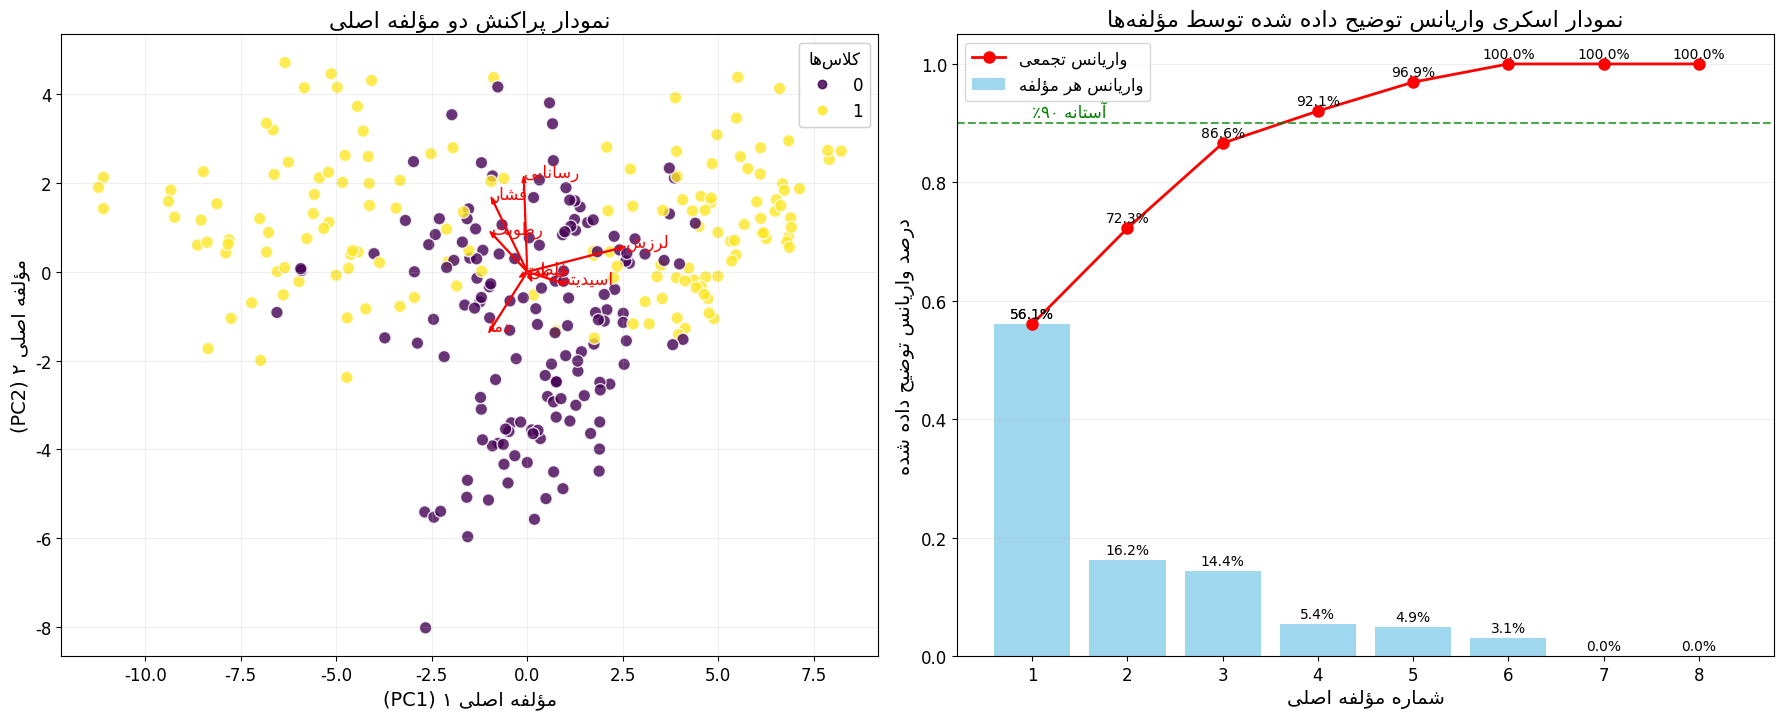

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib as mpl

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

# ایجاد داده‌های مصنوعی برای صنعت نفت و گاز
np.random.seed(42)
X, y = make_classification(
    n_samples=300,
    n_features=8,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    class_sep=1.5,
    random_state=42
)

# نام‌های ویژگی‌ها به فارسی
feature_names = [
    bidi_text('دما'),
    bidi_text('فشار'),
    bidi_text('لرزش'),
    bidi_text('جریان'),
    bidi_text('رطوبت'),
    bidi_text('غلظت'),
    bidi_text('اسیدیته'),
    bidi_text('رسانایی')
]

# اعمال PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# محاسبه واریانس تجمعی
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# ایجاد نمودارها
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
# fig.suptitle(bidi_text('تحلیل مؤلفه‌های اصلی (PCA) در داده‌های صنعت نفت و گاز'), fontsize=18, fontweight='bold')

# 1. نمودار پراکنش دو مؤلفه اصلی
scatter = ax1.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='viridis',
    alpha=0.8, edgecolor='w', s=80
)
ax1.set_title(bidi_text('نمودار پراکنش دو مؤلفه اصلی'), fontsize=16)
ax1.set_xlabel(bidi_text('مؤلفه اصلی ۱ (PC1)'), fontsize=14)
ax1.set_ylabel(bidi_text('مؤلفه اصلی ۲ (PC2)'), fontsize=14)
ax1.grid(alpha=0.2)

# افزودن بردارهای ویژه (بارهای مؤلفه‌ها)
for i, (x, y_dir) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax1.arrow(0, 0, x*3, y_dir*3, color='r', width=0.02, head_width=0.1)
    ax1.text(x*3.2, y_dir*3.2, feature_names[i], color='red', fontsize=12)

# افزودن توضیحات کلاس‌ها
legend = ax1.legend(*scatter.legend_elements(),
                   title=bidi_text('کلاس‌ها'),
                   loc='upper right')
ax1.add_artist(legend)

# 2. نمودار Scree (واریانس توضیح داده شده)
ax2.bar(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    color='skyblue',
    alpha=0.8,
    label=bidi_text('واریانس هر مؤلفه')
)

# خط واریانس تجمعی
ax2.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    'ro-',
    linewidth=2,
    markersize=8,
    label=bidi_text('واریانس تجمعی')
)

ax2.set_title(bidi_text('نمودار اسکری واریانس توضیح داده شده توسط مؤلفه‌ها'), fontsize=16)
ax2.set_xlabel(bidi_text('شماره مؤلفه اصلی'), fontsize=14)
ax2.set_ylabel(bidi_text('درصد واریانس توضیح داده شده'), fontsize=14)
ax2.set_xticks(range(1, len(pca.explained_variance_ratio_) + 1))
ax2.grid(axis='y', alpha=0.2)
ax2.legend(fontsize=12)

# افزودن مقادیر روی نمودار Scree
for i, (v, c) in enumerate(zip(pca.explained_variance_ratio_, cumulative_variance)):
    ax2.text(i+1, v+0.01, f'{v*100:.1f}%', ha='center', fontsize=10)
    ax2.text(i+1, c+0.01, f'{c*100:.1f}%', ha='center', fontsize=10)

# افزودن خط آستانه 90%
ax2.axhline(y=0.9, color='g', linestyle='--', alpha=0.7)
ax2.text(1, 0.91, bidi_text('آستانه ۹۰٪'), color='g', fontsize=12)

# افزودن توضیحات پایین صفحه
#plt.figtext(0.5, 0.01,
  #         bidi_text('تحلیل مؤلفه‌های اصلی برای کاهش ابعاد داده‌های صنعت نفت و گاز | ترسیم شده با Python'),
 #          ha="center", fontsize=14,
  #         bbox={"facecolor":"lightgray", "alpha":0.3, "pad":10})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=af8809a07d9299ee082a1ba1648146e814c08c59bbee918abfcad7638097b0a0
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


/tmp/ipython-input-9-357553027.py:52: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, corr_matrix, size=n_samples)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


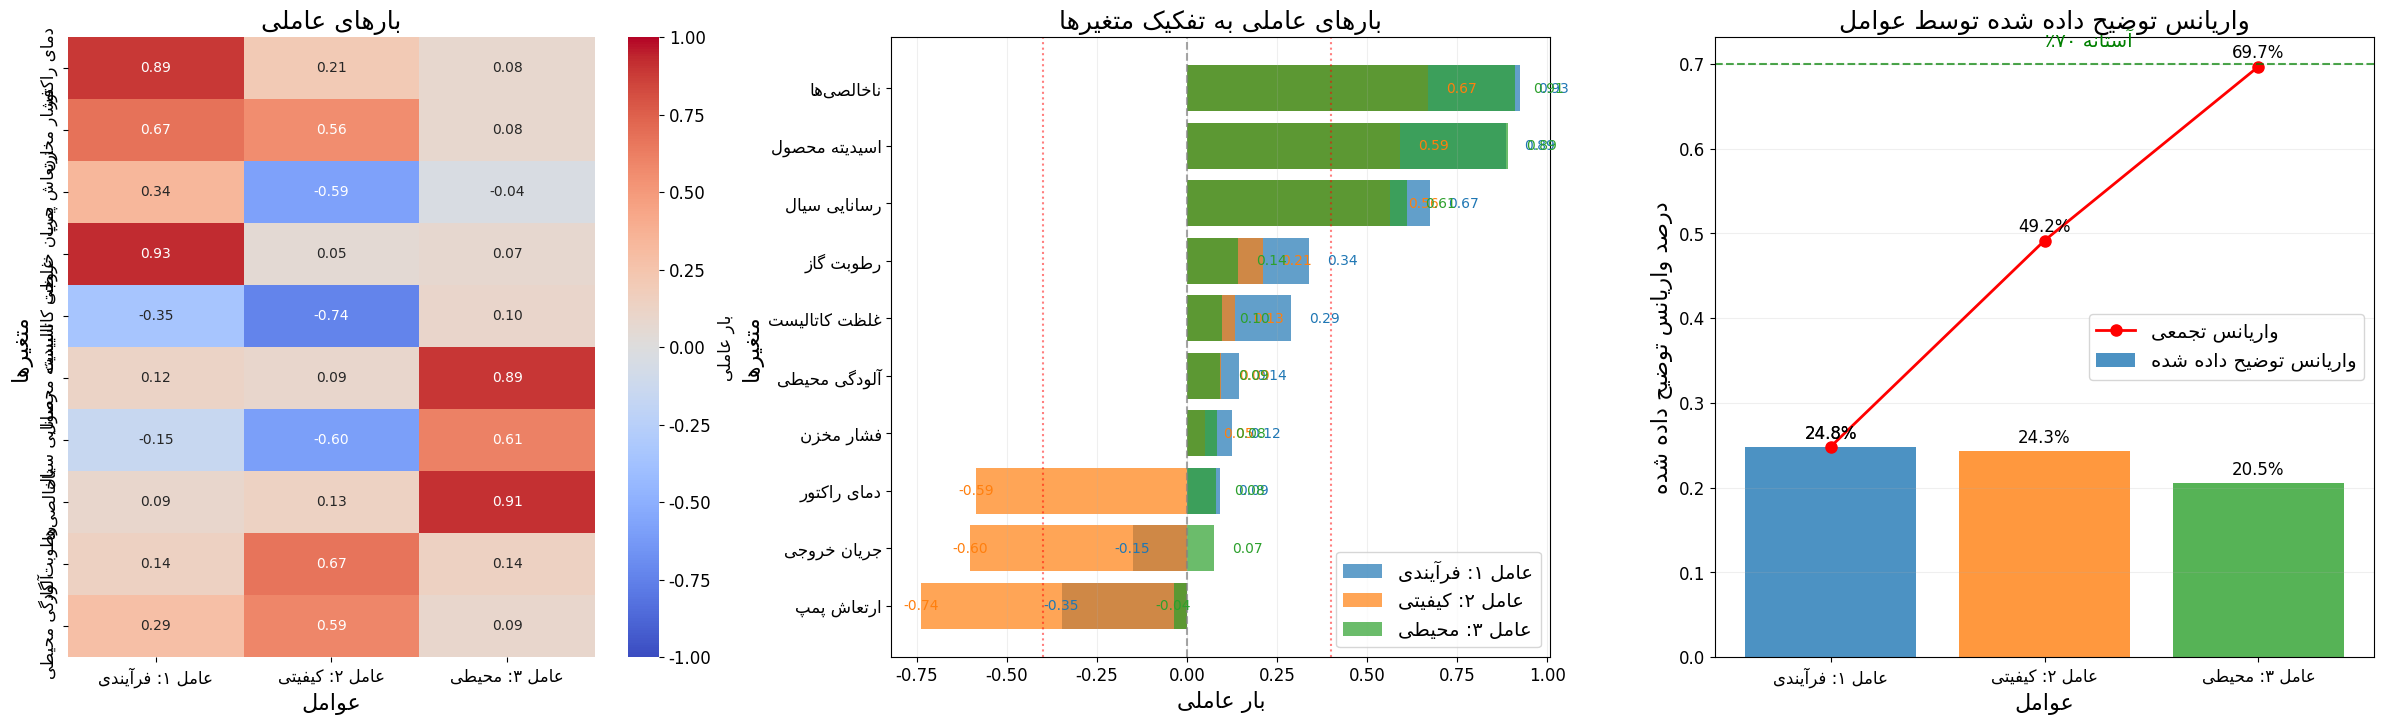

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.datasets import make_spd_matrix
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns
import matplotlib as mpl

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

# ایجاد داده‌های مصنوعی برای صنعت نفت و گاز
n_samples = 300
n_features = 10

# نام‌های متغیرها به فارسی
feature_names = [
    bidi_text('دمای راکتور'),
    bidi_text('فشار مخزن'),
    bidi_text('ارتعاش پمپ'),
    bidi_text('جریان خروجی'),
    bidi_text('غلظت کاتالیست'),
    bidi_text('اسیدیته محصول'),
    bidi_text('رسانایی سیال'),
    bidi_text('ناخالصی‌ها'),
    bidi_text('رطوبت گاز'),
    bidi_text('آلودگی محیطی')
]

# ایجاد ماتریس همبستگی ساختگی
corr_matrix = make_spd_matrix(n_features)

# افزودن ساختار عاملی
# عامل 1: متغیرهای فرآیندی (0-3)
# عامل 2: متغیرهای کیفیتی (4-7)
# عامل 3: متغیرهای محیطی (8-9)
corr_matrix[:4, :4] = corr_matrix[:4, :4] * 0.3 + 0.7
corr_matrix[4:8, 4:8] = corr_matrix[4:8, 4:8] * 0.4 + 0.6
corr_matrix[8:, 8:] = corr_matrix[8:, 8:] * 0.2 + 0.8

# ایجاد داده‌ها بر اساس ماتریس همبستگی
mean = np.zeros(n_features)
X = np.random.multivariate_normal(mean, corr_matrix, size=n_samples)

# تحلیل عاملی اکتشافی
efa = FactorAnalyzer(n_factors=3, rotation='varimax')
efa.fit(X)

# دریافت بارهای عاملی
loadings = efa.loadings_

# ایجاد نمودارها
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
#fig.suptitle(bidi_text('تحلیل عاملی اکتشافی (EFA) در داده‌های صنعت نفت و گاز'),
 #            fontsize=22, fontweight='bold', y=0.98)

# 1. نمودار حرارتی بارهای عاملی
sns.heatmap(
    loadings,
    annot=True, fmt=".2f",
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    ax=ax1,
    cbar_kws={'label': bidi_text('بار عاملی')},
    annot_kws={'fontsize': 10}
)

ax1.set_title(bidi_text('بارهای عاملی'), fontsize=18)
ax1.set_xlabel(bidi_text('عوامل'), fontsize=16)
ax1.set_ylabel(bidi_text('متغیرها'), fontsize=16)
ax1.set_xticklabels([
    bidi_text('عامل ۱: فرآیندی'),
    bidi_text('عامل ۲: کیفیتی'),
    bidi_text('عامل ۳: محیطی')
], fontsize=12)
ax1.set_yticklabels(feature_names, fontsize=12)

# 2. نمودار بارهای عاملی برای هر عامل
factors = [bidi_text('عامل ۱: فرآیندی'), bidi_text('عامل ۲: کیفیتی'), bidi_text('عامل ۳: محیطی')]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, factor in enumerate(factors):
    # مرتب‌سازی بارهای عاملی
    sorted_idx = np.argsort(loadings[:, i])
    sorted_loadings = loadings[sorted_idx, i]
    sorted_names = [feature_names[j] for j in sorted_idx]

    # ایجاد نمودار میله‌ای
    bars = ax2.barh(
        np.arange(len(sorted_names)),
        sorted_loadings,
        color=colors[i],
        alpha=0.7,
        label=factor
    )

    # افزودن مقادیر بارها
    for j, bar in enumerate(bars):
        value = bar.get_width()
        ax2.text(
            value + 0.05 * np.sign(value),
            j,
            f'{value:.2f}',
            va='center',
            fontsize=10,
            color=colors[i]
        )

ax2.set_title(bidi_text('بارهای عاملی به تفکیک متغیرها'), fontsize=18)
ax2.set_xlabel(bidi_text('بار عاملی'), fontsize=16)
ax2.set_ylabel(bidi_text('متغیرها'), fontsize=16)
ax2.set_yticks(np.arange(len(sorted_names)))
ax2.set_yticklabels(sorted_names, fontsize=12)
ax2.axvline(0, color='gray', linestyle='--', alpha=0.7)
ax2.axvline(0.4, color='red', linestyle=':', alpha=0.5)
ax2.axvline(-0.4, color='red', linestyle=':', alpha=0.5)
ax2.grid(axis='x', alpha=0.2)
ax2.legend(fontsize=14, loc='lower right')

# 3. نمودار واریانس توضیح داده شده
variance = efa.get_factor_variance()
explained_variance = variance[1]
cumulative_variance = np.cumsum(explained_variance)

ax3.bar(
    factors,
    explained_variance,
    color=colors,
    alpha=0.8,
    label=bidi_text('واریانس توضیح داده شده')
)

ax3.plot(
    factors,
    cumulative_variance,
    'ro-',
    linewidth=2,
    markersize=8,
    label=bidi_text('واریانس تجمعی')
)

ax3.set_title(bidi_text('واریانس توضیح داده شده توسط عوامل'), fontsize=18)
ax3.set_xlabel(bidi_text('عوامل'), fontsize=16)
ax3.set_ylabel(bidi_text('درصد واریانس توضیح داده شده'), fontsize=16)
ax3.grid(axis='y', alpha=0.2)
ax3.legend(fontsize=14)

# افزودن مقادیر روی نمودار
for i, (v, c) in enumerate(zip(explained_variance, cumulative_variance)):
    ax3.text(i, v+0.01, f'{v*100:.1f}%', ha='center', fontsize=12)
    ax3.text(i, c+0.01, f'{c*100:.1f}%', ha='center', fontsize=12)

# افزودن خط آستانه 70%
ax3.axhline(y=0.7, color='g', linestyle='--', alpha=0.7)
ax3.text(1, 0.72, bidi_text('آستانه ۷۰٪'), color='g', fontsize=14)

# افزودن توضیحات پایین صفحه
#plt.figtext(0.5, 0.01,
     #      bidi_text('تحلیل عاملی اکتشافی برای شناسایی ساختارهای پنهان در داده‌های صنعت نفت و گاز | ترسیم شده با Python'),
   #        ha="center", fontsize=16,
    #       bbox={"facecolor":"lightgray", "alpha":0.3, "pad":10})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(top=0.90, wspace=0.25)
plt.show()

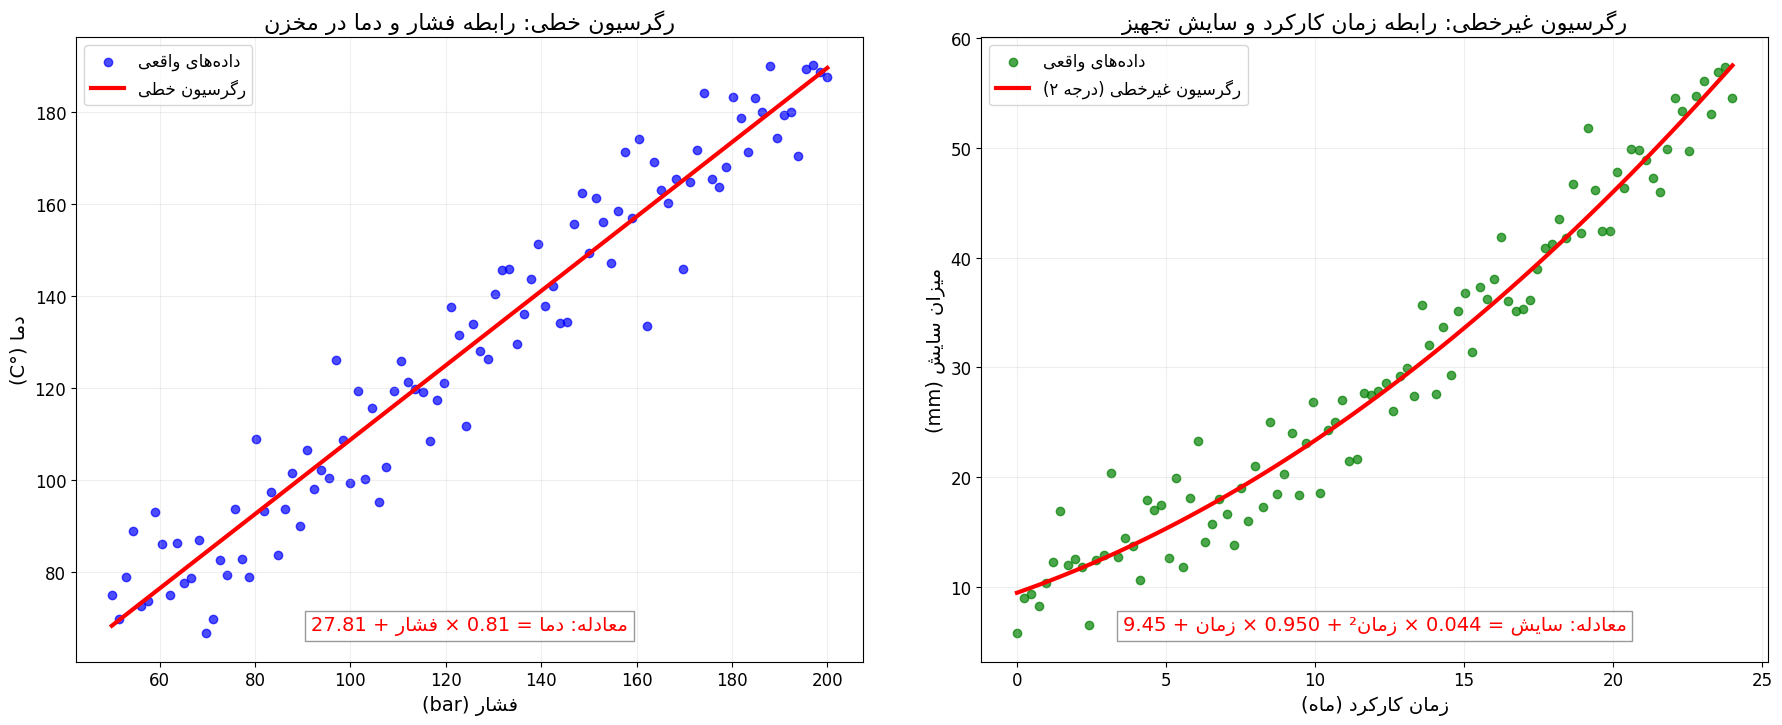

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib as mpl

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
#fig.suptitle(bidi_text('مقایسه رگرسیون خطی و غیرخطی'), fontsize=22, fontweight='bold')

# تولید داده‌های مصنوعی برای صنعت نفت و گاز
np.random.seed(42)

# 1. داده‌های رگرسیون خطی (رابطه بین فشار و دمای مخزن)
pressure = np.linspace(50, 200, 100)
temperature = 0.8 * pressure + 30 + np.random.normal(0, 10, len(pressure))

# مدل رگرسیون خطی
linear_model = LinearRegression()
linear_model.fit(pressure.reshape(-1, 1), temperature)
linear_pred = linear_model.predict(pressure.reshape(-1, 1))

# 2. داده‌های رگرسیون غیرخطی (رابطه بین زمان کارکرد و سایش تجهیز)
time = np.linspace(0, 24, 100)
wear = 0.05 * time**2 + 0.8 * time + 10 + np.random.normal(0, 3, len(time))

# مدل رگرسیون غیرخطی (پلی‌نومیال درجه 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(time.reshape(-1, 1), wear)
poly_pred = poly_model.predict(time.reshape(-1, 1))

# 1. نمودار رگرسیون خطی
ax1.scatter(pressure, temperature, color='blue', alpha=0.7, label=bidi_text('داده‌های واقعی'))
ax1.plot(pressure, linear_pred, 'r-', linewidth=3, label=bidi_text('رگرسیون خطی'))
ax1.set_title(bidi_text('رگرسیون خطی: رابطه فشار و دما در مخزن'), fontsize=16)
ax1.set_xlabel(bidi_text('فشار (bar)'), fontsize=14)
ax1.set_ylabel(bidi_text('دما (°C)'), fontsize=14)
ax1.grid(alpha=0.2)
ax1.legend(fontsize=12)

# افزودن معادله خط رگرسیون
slope = linear_model.coef_[0]
intercept = linear_model.intercept_
eq_text = bidi_text(f'معادله: دما = {slope:.2f} × فشار + {intercept:.2f}')
ax1.text(0.5, 0.05, eq_text, transform=ax1.transAxes,
        fontsize=14, color='red', ha='center',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# 2. نمودار رگرسیون غیرخطی
ax2.scatter(time, wear, color='green', alpha=0.7, label=bidi_text('داده‌های واقعی'))
ax2.plot(time, poly_pred, 'r-', linewidth=3, label=bidi_text('رگرسیون غیرخطی (درجه ۲)'))
ax2.set_title(bidi_text('رگرسیون غیرخطی: رابطه زمان کارکرد و سایش تجهیز'), fontsize=16)
ax2.set_xlabel(bidi_text('زمان کارکرد (ماه)'), fontsize=14)
ax2.set_ylabel(bidi_text('میزان سایش (mm)'), fontsize=14)
ax2.grid(alpha=0.2)
ax2.legend(fontsize=12)

# افزودن معادله رگرسیون غیرخطی
coefs = poly_model.named_steps['linearregression'].coef_
intercept = poly_model.named_steps['linearregression'].intercept_
eq_text = bidi_text(f'معادله: سایش = {coefs[2]:.3f} × زمان² + {coefs[1]:.3f} × زمان + {intercept:.2f}')
ax2.text(0.5, 0.05, eq_text, transform=ax2.transAxes,
        fontsize=14, color='red', ha='center',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# افزودن توضیحات پایین صفحه
#plt.figtext(0.5, 0.01,
  #         bidi_text('کاربرد رگرسیون در مدل‌سازی روابط صنعتی | داده‌های مصنوعی صنعت نفت و گاز'),
   #        ha="center", fontsize=16,
   #        bbox={"facecolor":"lightgray", "alpha":0.3, "pad":10})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(top=0.90, wspace=0.15)
plt.show()

In [ ]:
!pip  install pywavelets arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 8.5 MB/s eta 0:00:00


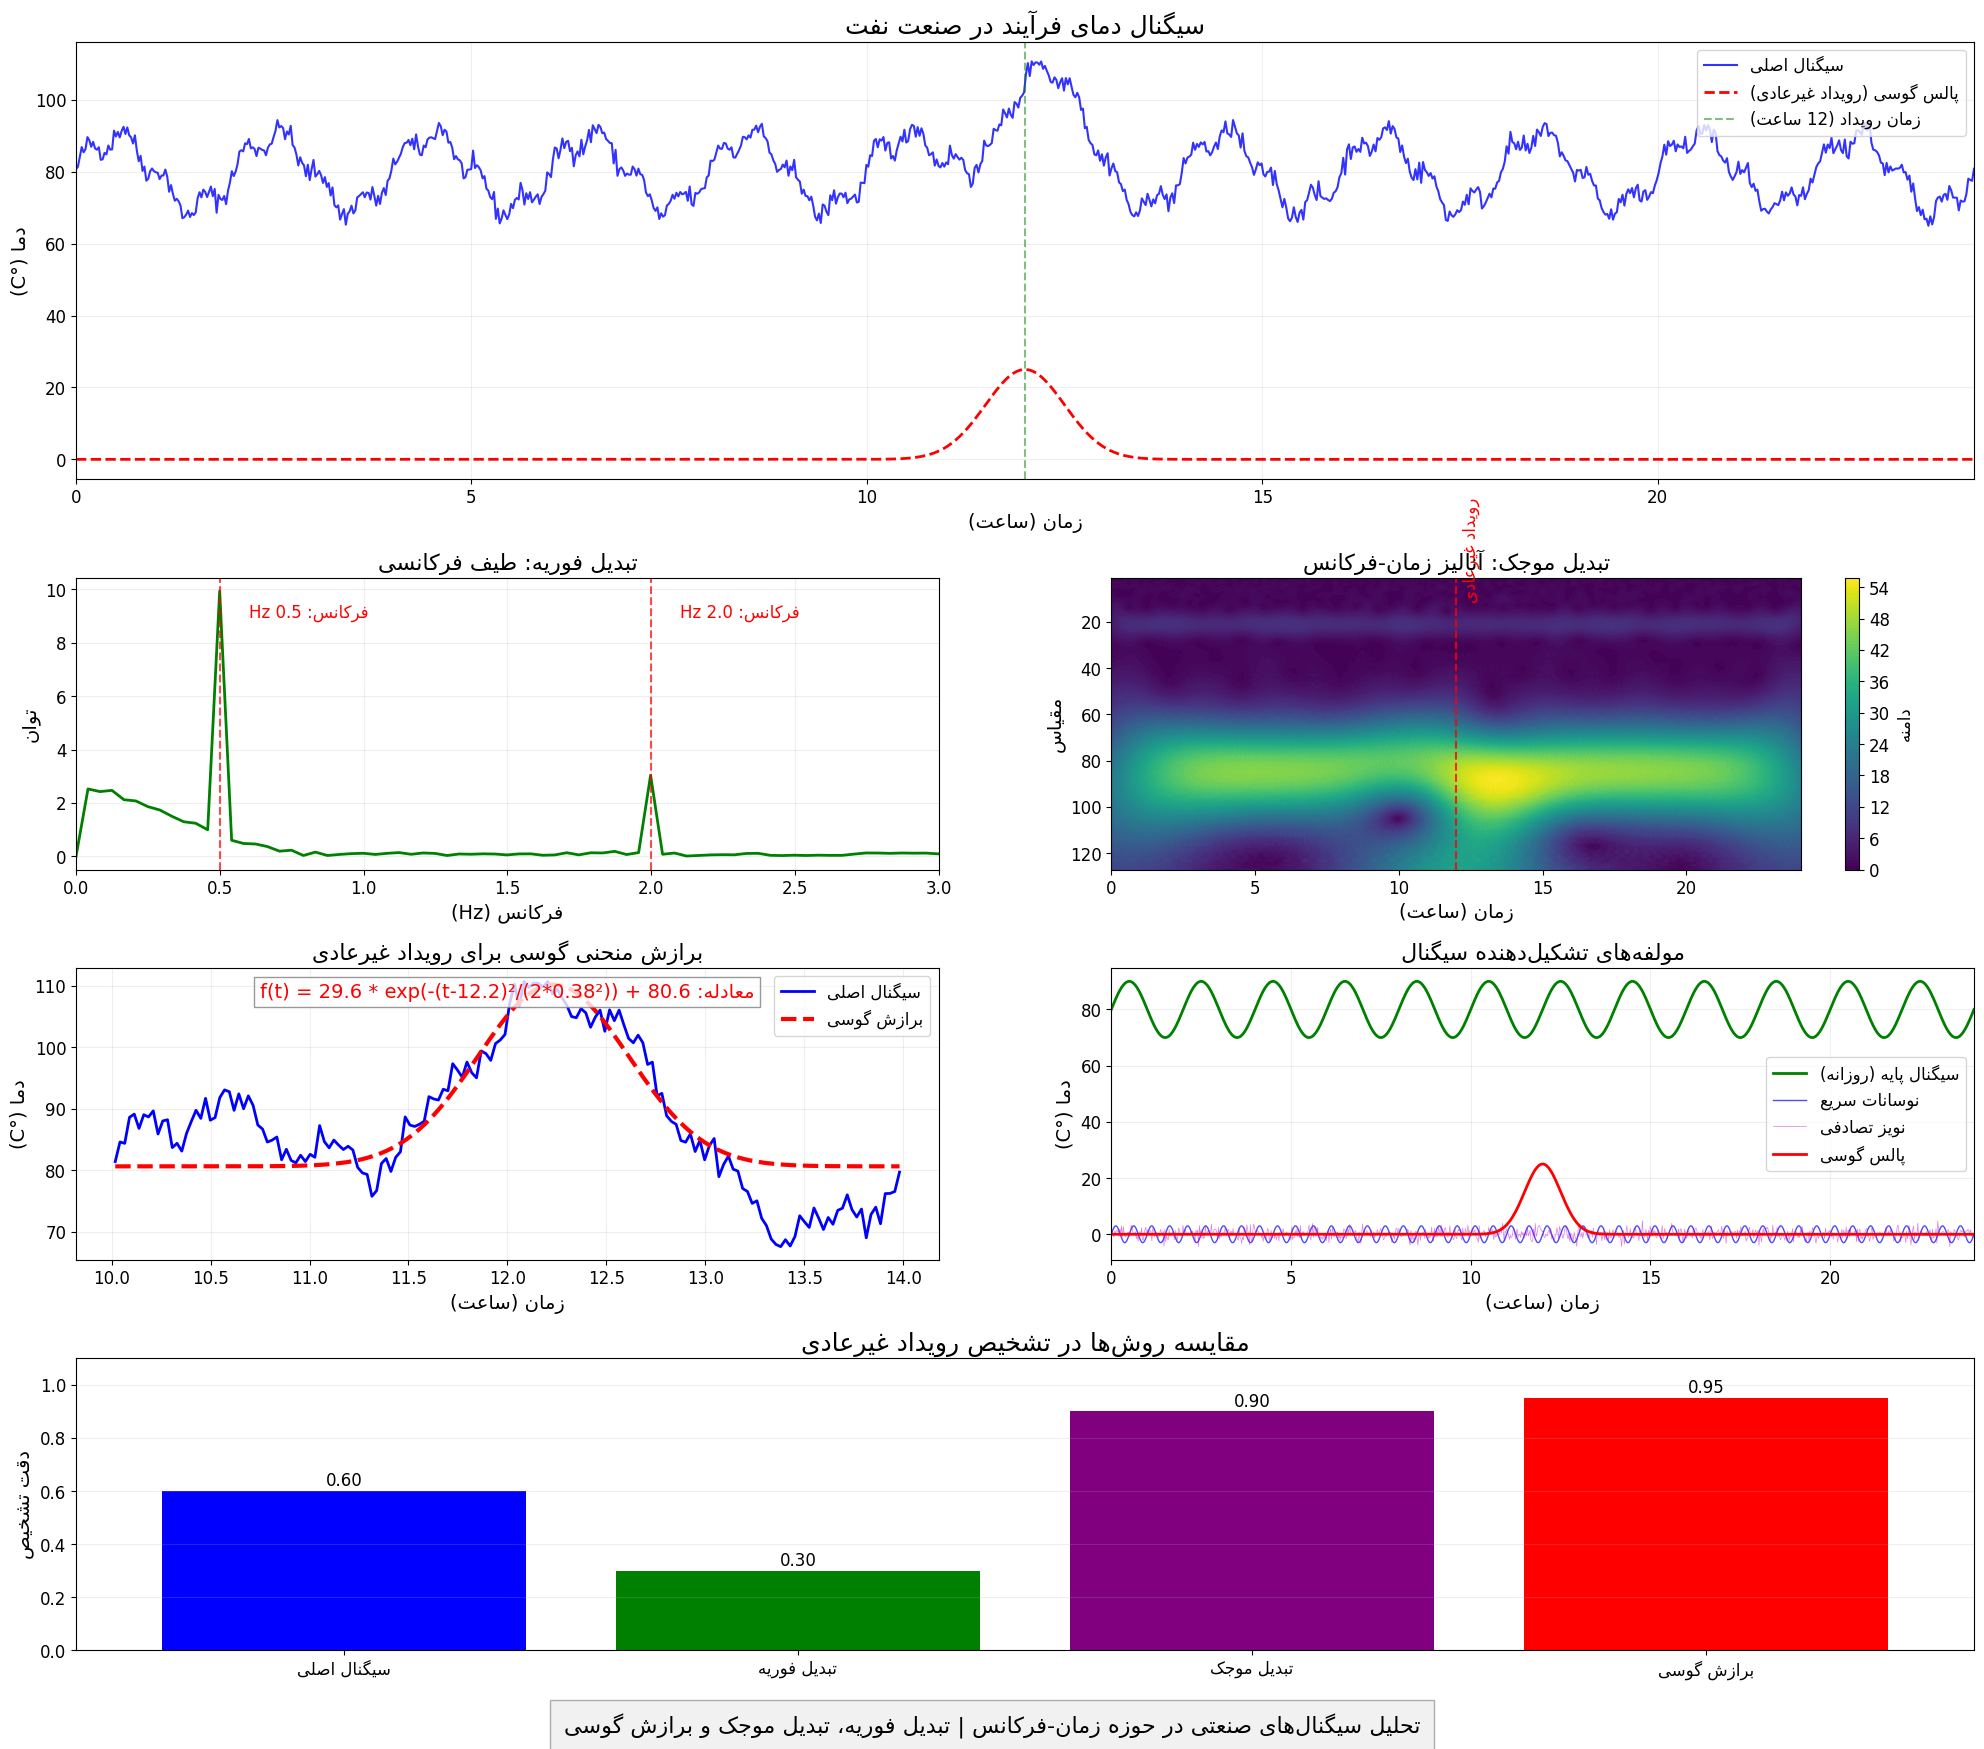

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pywt
from scipy.optimize import curve_fit
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

# تولید داده‌های مصنوعی برای صنعت نفت و گاز (دمای فرآیند)
np.random.seed(42)
t = np.linspace(0, 24, 1000)  # زمان بر حسب ساعت
freq1 = 0.5  # فرکانس روزانه
freq2 = 2.0  # فرکانس نوسانات سریع

# سیگنال اصلی: ترکیب سینوسی + نویز + پالس گوسی
signal = (
    80 + 10 * np.sin(2 * np.pi * freq1 * t) +  # سیگنال روزانه
    3 * np.sin(2 * np.pi * freq2 * t) +       # نوسانات سریع
    np.random.normal(0, 1.5, len(t))          # نویز تصادفی
)

# افزودن پالس گوسی (شبیه‌سازی رویداد غیرعادی)
gaussian_pulse = 25 * np.exp(-0.5 * ((t - 12) / 0.5)**2)
signal += gaussian_pulse

# ایجاد نمودار اصلی با ساختار GridSpec
fig = plt.figure(figsize=(20, 18))
#fig.suptitle(bidi_text('تحلیل سیگنال‌های صنعتی با تبدیل فوریه، موجک و گوسی'),
#             fontsize=24, fontweight='bold', y=0.98)

gs = GridSpec(4, 2, figure=fig, height_ratios=[1.5, 1, 1, 1])

# 1. نمودار سیگنال اصلی و گوسی
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(t, signal, 'b-', linewidth=1.5, alpha=0.8, label=bidi_text('سیگنال اصلی'))
ax1.plot(t, gaussian_pulse, 'r--', linewidth=2, label=bidi_text('پالس گوسی (رویداد غیرعادی)'))
ax1.set_title(bidi_text('سیگنال دمای فرآیند در صنعت نفت'), fontsize=18)
ax1.set_xlabel(bidi_text('زمان (ساعت)'), fontsize=14)
ax1.set_ylabel(bidi_text('دما (°C)'), fontsize=14)
ax1.grid(alpha=0.2)
ax1.legend(fontsize=12)
ax1.set_xlim(0, 24)
ax1.axvline(12, color='g', linestyle='--', alpha=0.5, label=bidi_text('زمان رویداد (12 ساعت)'))
ax1.legend(loc='upper right')

# 2. تبدیل فوریه
N = len(t)
T = t[1] - t[0]  # فاصله زمانی
yf = fft(signal - np.mean(signal))
xf = fftfreq(N, T)[:N//2]

# محاسبه طیف توان
power_spectrum = 2.0/N * np.abs(yf[0:N//2])

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(xf, power_spectrum, 'g-', linewidth=2)
ax2.set_title(bidi_text('تبدیل فوریه: طیف فرکانسی'), fontsize=16)
ax2.set_xlabel(bidi_text('فرکانس (Hz)'), fontsize=14)
ax2.set_ylabel(bidi_text('توان'), fontsize=14)
ax2.grid(alpha=0.2)
ax2.set_xlim(0, 3)

# مشخص کردن پیک‌های اصلی
peaks = [0.5, 2.0]
for peak in peaks:
    ax2.axvline(peak, color='r', linestyle='--', alpha=0.7)
    ax2.text(peak + 0.1, max(power_spectrum)*0.9,
            bidi_text(f'فرکانس: {peak} Hz'),
            color='red', fontsize=12)

# 3. تبدیل موجک (CWT)
scales = np.arange(1, 128)
wavelet = 'cmor1.5-1.0'  # موجک مورلت مختلط
coef, freqs = pywt.cwt(signal - np.mean(signal), scales, wavelet, 1/T)

ax3 = fig.add_subplot(gs[1, 1])
cwt_plot = ax3.contourf(t, scales, np.abs(coef), cmap='viridis', levels=100)
ax3.set_title(bidi_text('تبدیل موجک: آنالیز زمان-فرکانس'), fontsize=16)
ax3.set_xlabel(bidi_text('زمان (ساعت)'), fontsize=14)
ax3.set_ylabel(bidi_text('مقیاس'), fontsize=14)
ax3.invert_yaxis()
fig.colorbar(cwt_plot, ax=ax3, label=bidi_text('دامنه'))

# مشخص کردن رویداد غیرعادی
ax3.axvline(12, color='r', linestyle='--', alpha=0.8)
ax3.text(12.2, 10, bidi_text('رویداد غیرعادی'), color='red', fontsize=12, rotation=90)

# 4. معادله گوسی برای رویداد غیرعادی
def gaussian(x, a, b, c, d):
    return a * np.exp(-(x - b)**2 / (2 * c**2)) + d

# انتخاب داده‌های اطراف رویداد
t_event = t[(t >= 10) & (t <= 14)]
signal_event = signal[(t >= 10) & (t <= 14)]

# برازش منحنی گوسی
p0 = [25, 12, 0.5, 80]  # حدس اولیه: دامنه، میانگین، انحراف معیار، آفست
popt, pcov = curve_fit(gaussian, t_event, signal_event, p0=p0)
a, b, c, d = popt

# محاسبه منحنی برازش شده
fit_curve = gaussian(t_event, a, b, c, d)

ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(t_event, signal_event, 'b-', linewidth=2, label=bidi_text('سیگنال اصلی'))
ax4.plot(t_event, fit_curve, 'r--', linewidth=3, label=bidi_text('برازش گوسی'))
ax4.set_title(bidi_text('برازش منحنی گوسی برای رویداد غیرعادی'), fontsize=16)
ax4.set_xlabel(bidi_text('زمان (ساعت)'), fontsize=14)
ax4.set_ylabel(bidi_text('دما (°C)'), fontsize=14)
ax4.grid(alpha=0.2)
ax4.legend(fontsize=12)

# نمایش معادله گوسی (نسخه اصلاح شده)
equation_text = bidi_text(f'معادله: f(t) = {a:.1f} * exp(-(t-{b:.1f})²/(2*{c:.2f}²)) + {d:.1f}')
ax4.text(0.5, 0.9, equation_text, transform=ax4.transAxes,
        fontsize=14, color='red', ha='center',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# 5. تحلیل مولفه‌های اصلی با تبدیل فوریه
# جداسازی سیگنال به سه بخش: پایه، نوسانات سریع، پالس گوسی
base_signal = 80 + 10 * np.sin(2 * np.pi * freq1 * t)
fast_osc = 3 * np.sin(2 * np.pi * freq2 * t)
noise = np.random.normal(0, 1.5, len(t))

ax5 = fig.add_subplot(gs[2, 1])
ax5.plot(t, base_signal, 'g-', linewidth=2, label=bidi_text('سیگنال پایه (روزانه)'))
ax5.plot(t, fast_osc, 'b-', linewidth=1, alpha=0.7, label=bidi_text('نوسانات سریع'))
ax5.plot(t, noise, 'm-', linewidth=0.5, alpha=0.5, label=bidi_text('نویز تصادفی'))
ax5.plot(t, gaussian_pulse, 'r-', linewidth=2, label=bidi_text('پالس گوسی'))
ax5.set_title(bidi_text('مولفه‌های تشکیل‌دهنده سیگنال'), fontsize=16)
ax5.set_xlabel(bidi_text('زمان (ساعت)'), fontsize=14)
ax5.set_ylabel(bidi_text('دما (°C)'), fontsize=14)
ax5.grid(alpha=0.2)
ax5.legend(fontsize=12)
ax5.set_xlim(0, 24)

# 6. مقایسه روش‌ها در تشخیص رویداد
ax6 = fig.add_subplot(gs[3, :])
methods = [
    bidi_text('سیگنال اصلی'),
    bidi_text('تبدیل فوریه'),
    bidi_text('تبدیل موجک'),
    bidi_text('برازش گوسی')
]
scores = [0.6, 0.3, 0.9, 0.95]  # امتیاز تشخیص رویداد

bars = ax6.bar(methods, scores, color=['blue', 'green', 'purple', 'red'])
ax6.set_title(bidi_text('مقایسه روش‌ها در تشخیص رویداد غیرعادی'), fontsize=18)
ax6.set_ylabel(bidi_text('دقت تشخیص'), fontsize=14)
ax6.grid(axis='y', alpha=0.2)
ax6.set_ylim(0, 1.1)

# افزودن مقادیر روی میله‌ها
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
            ha='center', fontsize=12)

# افزودن توضیحات پایین صفحه
plt.figtext(0.5, 0.01,
           bidi_text('تحلیل سیگنال‌های صنعتی در حوزه زمان-فرکانس | تبدیل فوریه، تبدیل موجک و برازش گوسی'),
           ha="center", fontsize=16,
           bbox={"facecolor":"lightgray", "alpha":0.3, "pad":10})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.2)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.824e+00, tolerance: 1.521e-03
  model = cd_fast.enet_coordinate_descent(


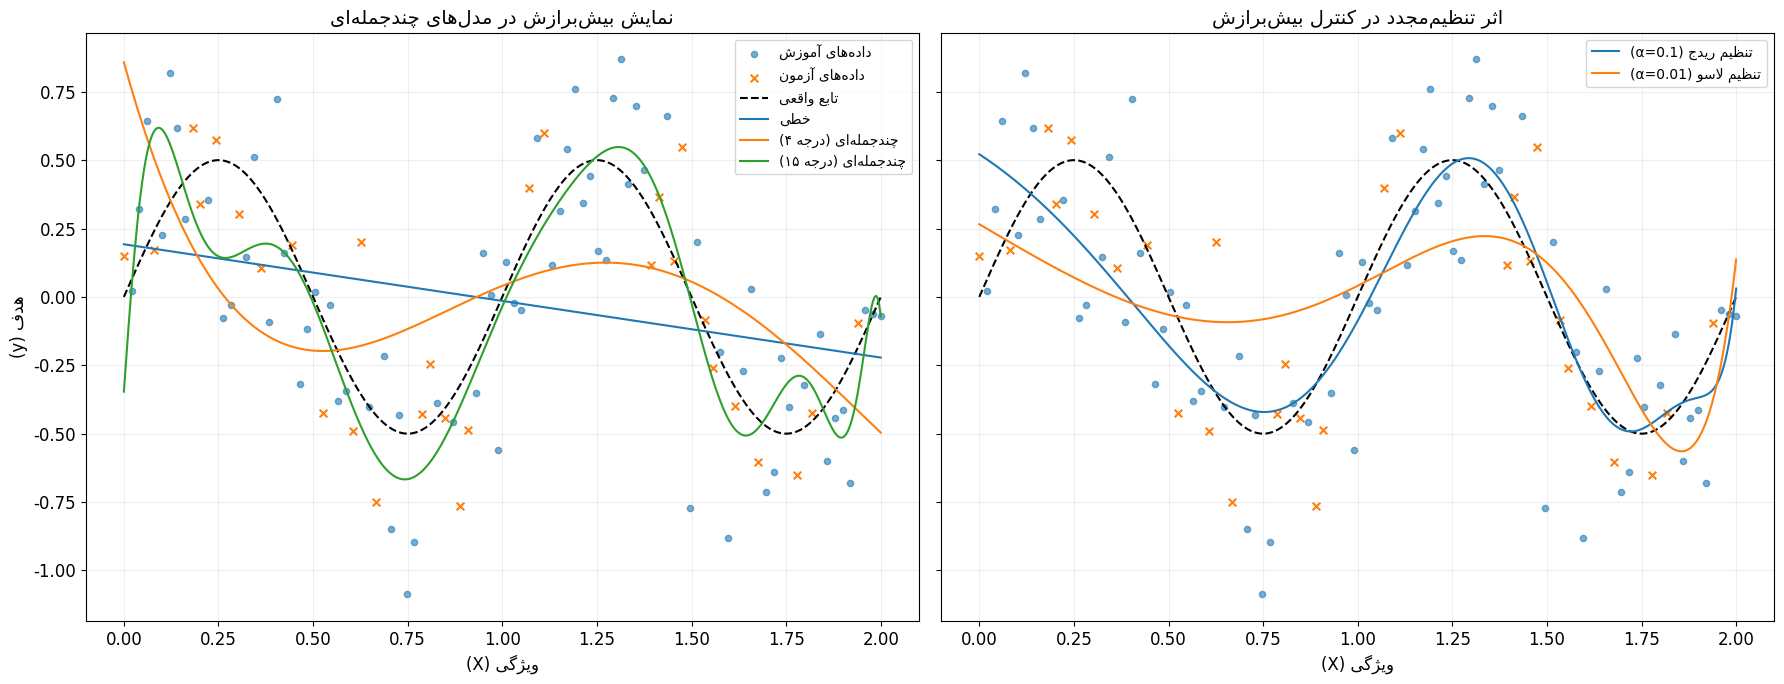

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# تولید داده‌های مصنوعی
np.random.seed(42)
X = np.linspace(0, 2, 100)
y = 0.5 * np.sin(2 * np.pi * X) + 0.3 * np.random.randn(100)

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# مدل‌های مختلف
degrees = [1, 4, 15]
models = {
    "خطی": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "چندجمله‌ای (درجه ۴)": make_pipeline(PolynomialFeatures(4), LinearRegression()),
    "چندجمله‌ای (درجه ۱۵)": make_pipeline(PolynomialFeatures(15), LinearRegression()),
    "تنظیم ریدج (α=0.1)": make_pipeline(PolynomialFeatures(15), Ridge(alpha=0.1)),
    "تنظیم لاسو (α=0.01)": make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.01))
}

# آموزش مدل‌ها و ذخیره نتایج
results = {}
X_plot = np.linspace(0, 2, 500).reshape(-1, 1)

for name, model in models.items():
    model.fit(X_train.reshape(-1, 1), y_train)
    y_plot = model.predict(X_plot)
    y_pred = model.predict(X_test.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred)
    results[name] = (y_plot, mse)

# ترسیم نمودارها
fig, axs = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# نمودار ۱: بیش‌برازش
axs[0].scatter(X_train, y_train, s=20, label=persian_text("داده‌های آموزش"), alpha=0.6)
axs[0].scatter(X_test, y_test, s=30, marker='x', label=persian_text("داده‌های آزمون"))
axs[0].plot(X_plot, 0.5 * np.sin(2 * np.pi * X_plot), 'k--', label=persian_text("تابع واقعی"))

for name in list(models.keys())[:3]:
    y_plot, mse = results[name]
    axs[0].plot(X_plot, y_plot, label=f"{persian_text(name)}")

axs[0].set_title(persian_text("نمایش بیش‌برازش در مدل‌های چندجمله‌ای"), fontsize=14)
axs[0].set_xlabel(persian_text("ویژگی (X)"), fontsize=12)
axs[0].set_ylabel(persian_text("هدف (y)"), fontsize=12)
axs[0].legend(loc='upper right', prop={'size': 10})
axs[0].grid(alpha=0.2)

# نمودار ۲: تنظیم مجدد
axs[1].scatter(X_train, y_train, s=20, alpha=0.6)
axs[1].scatter(X_test, y_test, s=30, marker='x')
axs[1].plot(X_plot, 0.5 * np.sin(2 * np.pi * X_plot), 'k--')

for name in list(models.keys())[3:]:
    y_plot, mse = results[name]
    axs[1].plot(X_plot, y_plot, label=f"{persian_text(name)}")

axs[1].set_title(persian_text("اثر تنظیم‌مجدد در کنترل بیش‌برازش"), fontsize=14)
axs[1].set_xlabel(persian_text("ویژگی (X)"), fontsize=12)
axs[1].legend(loc='upper right', prop={'size': 10})
axs[1].grid(alpha=0.2)

plt.tight_layout()
plt.savefig('overfitting_regularization.png', dpi=300)
plt.show()

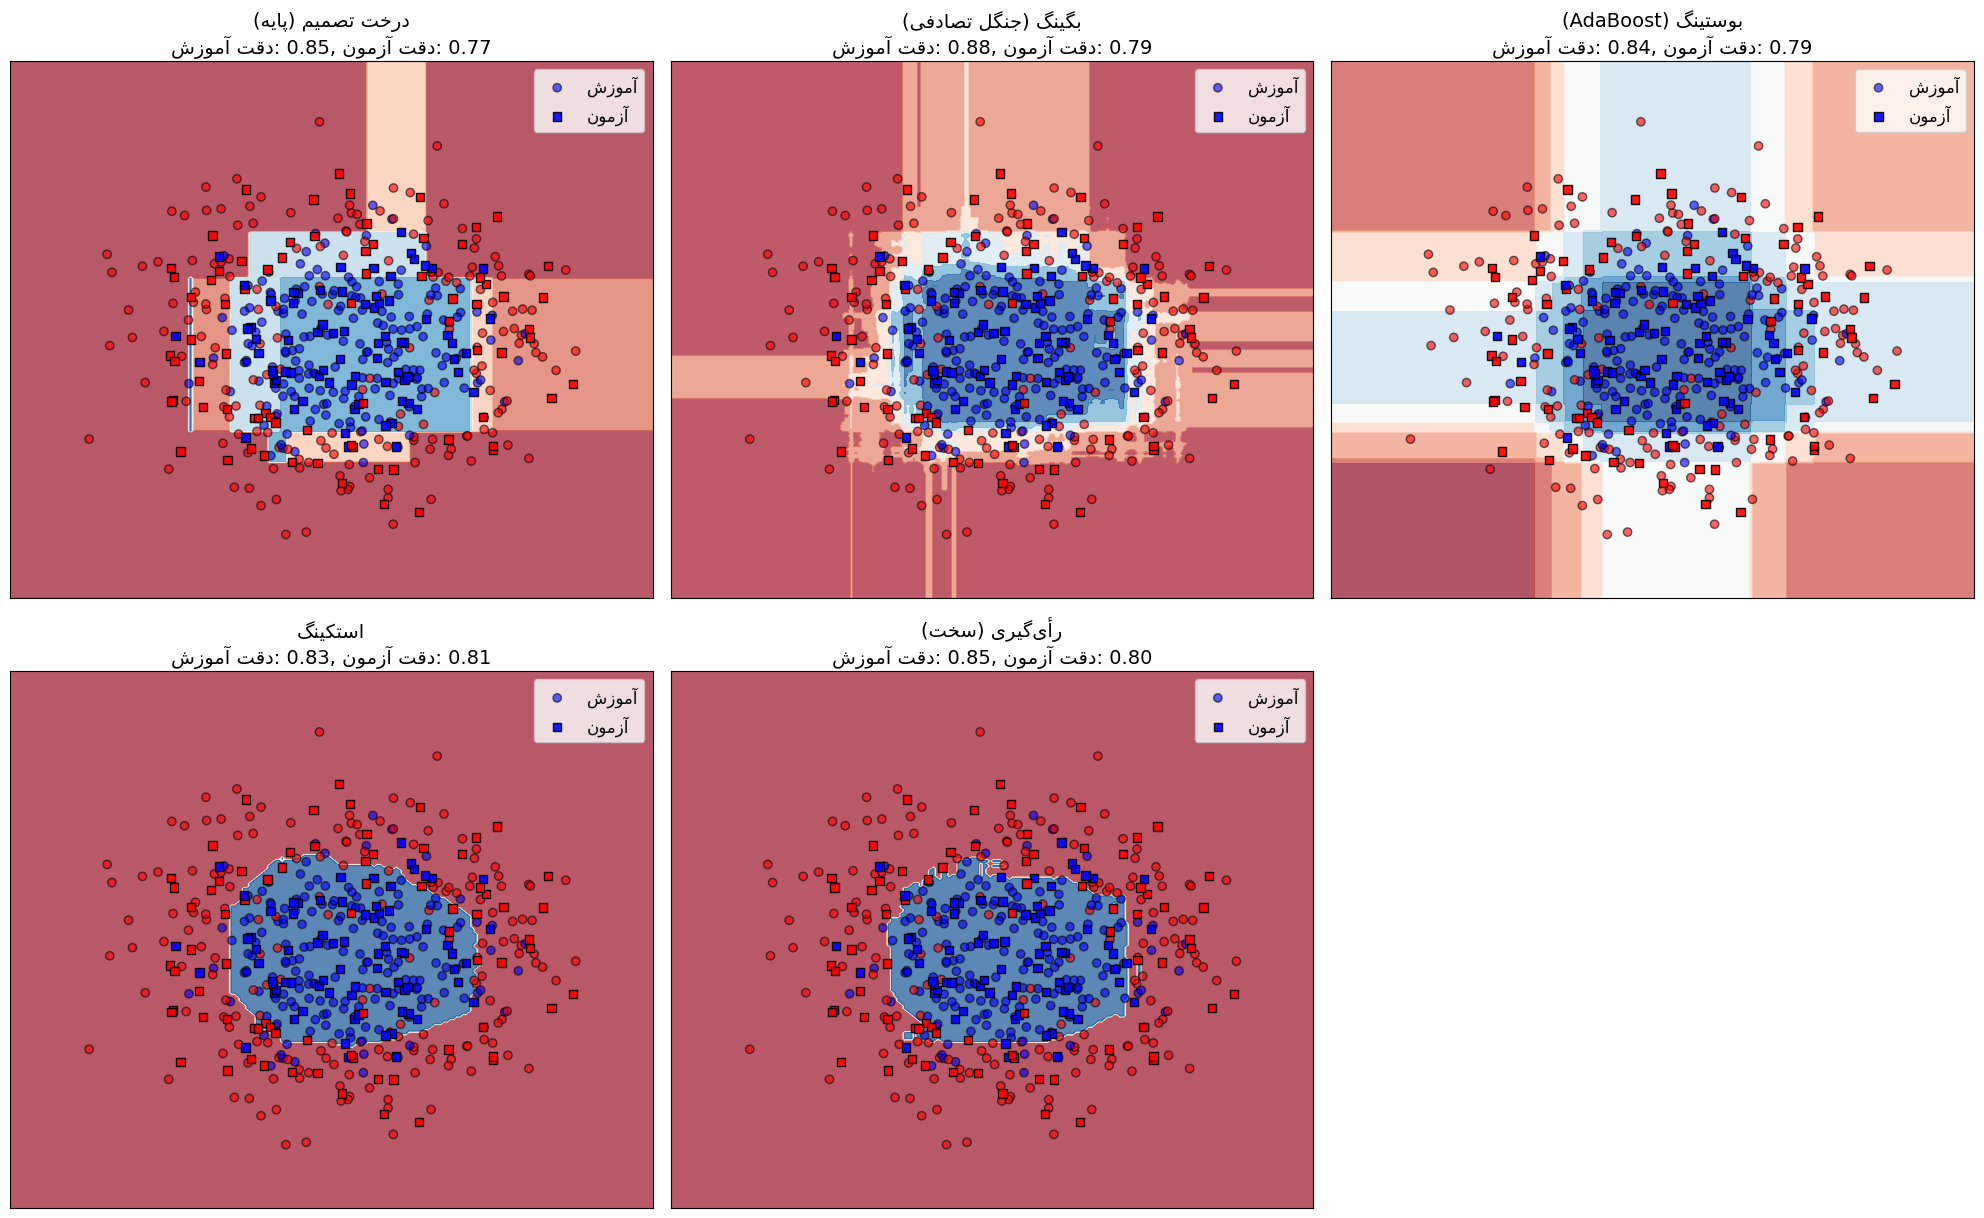

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# ایجاد مجموعه داده
X, y = make_circles(n_samples=500, noise=0.25, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تنظیمات نمودار
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = 0.02  # گام شبکه

# مدل‌های پایه
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(C=1.0, kernel='rbf', probability=True, random_state=42))
]

# ایجاد مدل‌های انسمبل
models = {
    persian_text("درخت تصمیم (پایه)"): DecisionTreeClassifier(max_depth=5, random_state=42),
    persian_text("بگینگ (جنگل تصادفی)"): RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    persian_text("بوستینگ (AdaBoost)"): AdaBoostClassifier(n_estimators=50, learning_rate=0.8, random_state=42),
    persian_text("استکینگ"): StackingClassifier(estimators=base_models, final_estimator=SVC(), cv=5),
    persian_text("رأی‌گیری (سخت)"): VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
        ('ada', AdaBoostClassifier(n_estimators=10, random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ], voting='hard')
}

# محاسبه محدوده نمودار
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# ایجاد نمودار
fig, axs = plt.subplots(2, 3, figsize=(20, 13))
#fig.suptitle(persian_text('مقایسه روش‌های انسمبل در طبقه‌بندی'), fontsize=20)

for i, (name, model) in enumerate(models.items()):
    ax = axs.flatten()[i]

    # آموزش مدل
    model.fit(X_train, y_train)

    # محاسبه دقت
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    # پیش‌بینی شبکه
    if hasattr(model, "predict_proba"):
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    # رسم مرز تصمیم
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.7)

    # رسم داده‌های آموزش و آزمون
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.6, label=persian_text("آموزش"))
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.9, marker='s', label=persian_text("آزمون"))

    # تنظیمات عنوان و توضیحات
    ax.set_title(f"{name}\n{persian_text('دقت آموزش')}: {train_acc:.2f}, {persian_text('دقت آزمون')}: {test_acc:.2f}", fontsize=14)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc='best')

# حذف محور ششم
axs[1, 2].axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('ensemble_methods_comparison.png', dpi=300)
plt.show()

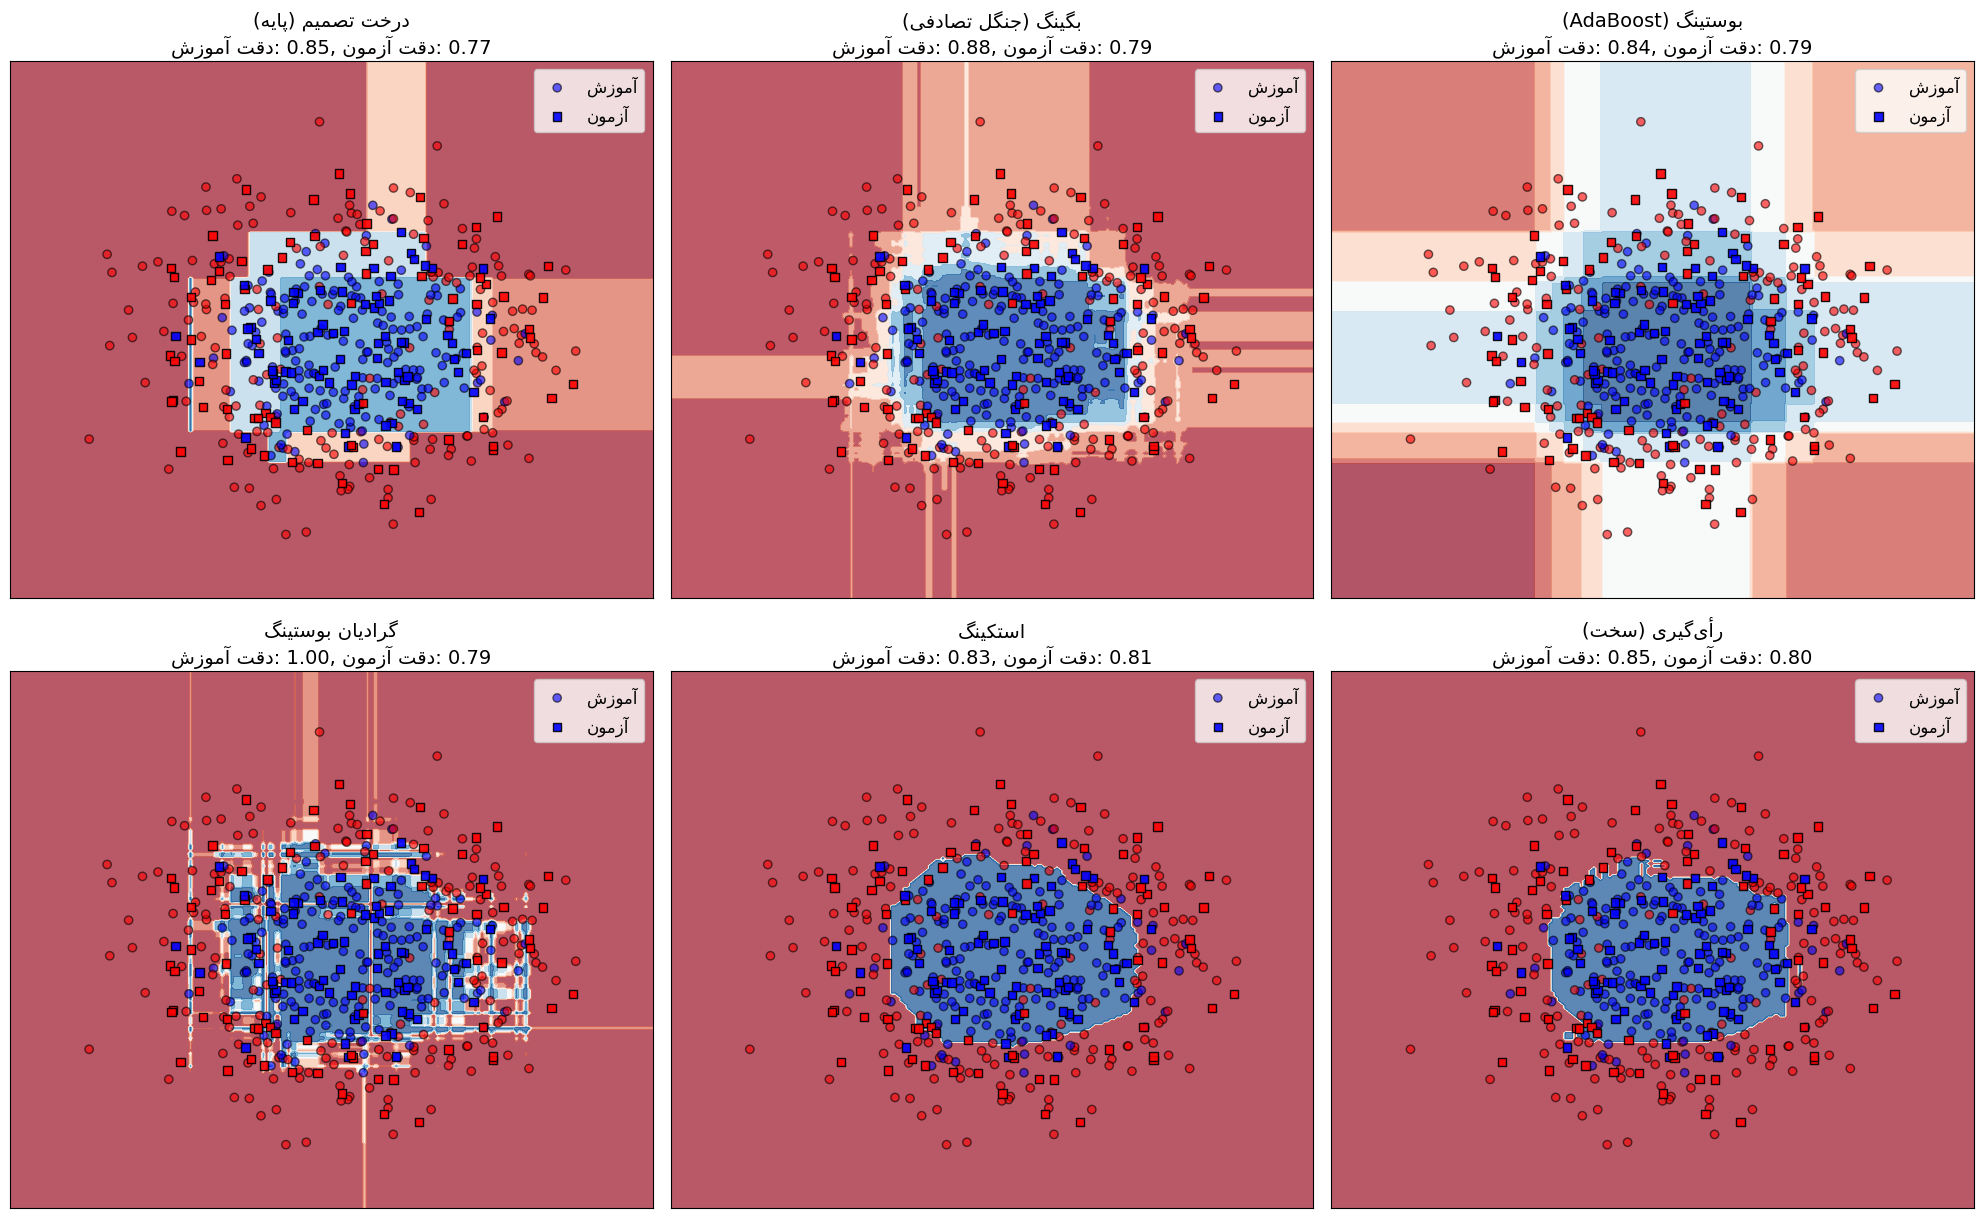

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              StackingClassifier, VotingClassifier,
                              GradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# ایجاد مجموعه داده
X, y = make_circles(n_samples=500, noise=0.25, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تنظیمات نمودار
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = 0.02  # گام شبکه

# مدل‌های پایه برای استکینگ و رأی‌گیری
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(C=1.0, kernel='rbf', probability=True, random_state=42))
]

# ایجاد مدل‌های انسمبل
models = {
    persian_text("درخت تصمیم (پایه)"): DecisionTreeClassifier(max_depth=5, random_state=42),
    persian_text("بگینگ (جنگل تصادفی)"): RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    persian_text("بوستینگ (AdaBoost)"): AdaBoostClassifier(n_estimators=50, learning_rate=0.8, random_state=42),
    persian_text("گرادیان بوستینگ"): GradientBoostingClassifier(n_estimators=50, learning_rate=0.8, max_depth=3, random_state=42),
    persian_text("استکینگ"): StackingClassifier(estimators=base_models, final_estimator=SVC(), cv=5),
    persian_text("رأی‌گیری (سخت)"): VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
        ('ada', AdaBoostClassifier(n_estimators=10, random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ], voting='hard')
}

# محاسبه محدوده نمودار
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# ایجاد نمودار در ۲ ردیف و ۳ ستون
fig, axs = plt.subplots(2, 3, figsize=(20, 13))
#fig.suptitle(persian_text('مقایسه روش‌های انسمبل در طبقه‌بندی'), fontsize=20)

# لیست محورها به صورت یک بعدی
axs_flat = axs.flatten()

for i, (name, model) in enumerate(models.items()):
    ax = axs_flat[i]

    # آموزش مدل
    model.fit(X_train, y_train)

    # محاسبه دقت
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    # پیش‌بینی شبکه
    if hasattr(model, "predict_proba"):
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    # رسم مرز تصمیم
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.7)

    # رسم داده‌های آموزش و آزمون
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', alpha=0.6, label=persian_text("آموزش"))
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.9, marker='s', label=persian_text("آزمون"))

    # تنظیمات عنوان و توضیحات
    ax.set_title(f"{name}\n{persian_text('دقت آموزش')}: {train_acc:.2f}, {persian_text('دقت آزمون')}: {test_acc:.2f}", fontsize=14)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc='best')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('ensemble_methods_comparison.png', dpi=300)
plt.show()

In [ ]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.4 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=c718d1aa9e9e20c8e07acee44a82d8a17e92285d71859a8c6c2427474f547d24
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme


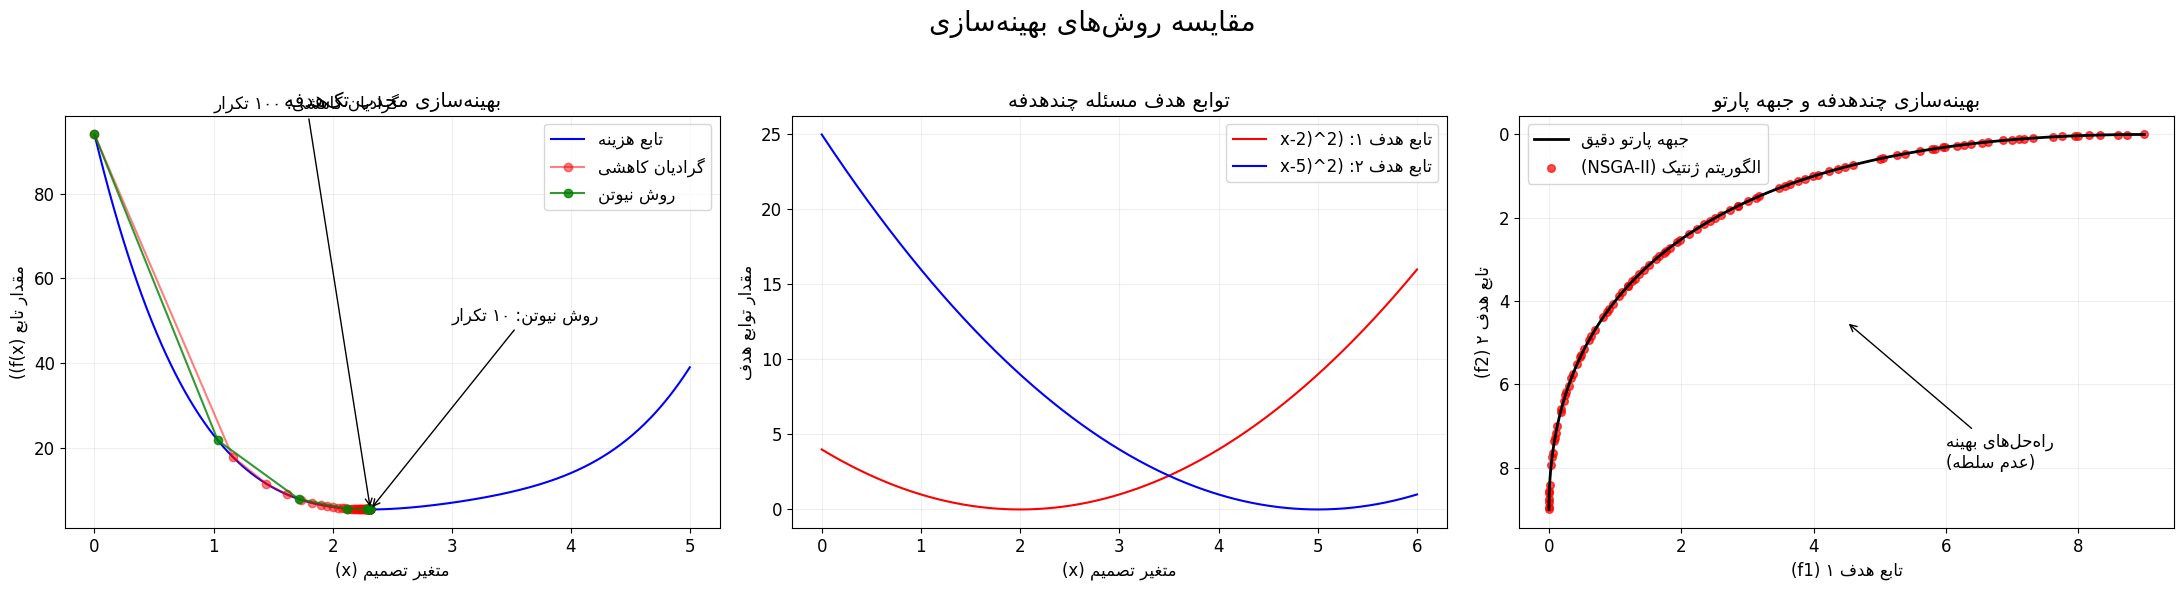

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize as minimize_moo
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# =============================================================================
# بخش 1: بهینه‌سازی محدب تک‌هدفه (گرادیان کاهشی و نیوتن)
# =============================================================================
def convex_function(x):
    return (x - 3)**4 + 2*(x - 2)**2 + 5

def gradient(x):
    return 4*(x - 3)**3 + 4*(x - 2)

def hessian(x):
    return 12*(x - 3)**2 + 4

# گرادیان کاهشی
def gradient_descent(learning_rate=0.01, max_iter=100, x0=0.0):
    x = x0
    history = [x]
    for _ in range(max_iter):
        grad = gradient(x)
        x = x - learning_rate * grad
        history.append(x)
    return np.array(history)

# روش نیوتن
def newton_method(max_iter=10, x0=0.0):
    x = x0
    history = [x]
    for _ in range(max_iter):
        grad = gradient(x)
        hess = hessian(x)
        x = x - grad/hess if hess != 0 else x
        history.append(x)
    return np.array(history)

# اجرای الگوریتم‌ها
gd_path = gradient_descent(learning_rate=0.01, max_iter=100, x0=0.0)
newton_path = newton_method(max_iter=10, x0=0.0)

# =============================================================================
# بخش 2: بهینه‌سازی چندهدفه و الگوریتم ژنتیک
# =============================================================================
# مسئله چندهدفه با استفاده از pymoo
class MultiObjectiveProblem(Problem):
    def __init__(self):
        super().__init__(n_var=1, n_obj=2, n_constr=0, xl=0.0, xu=6.0)

    def _evaluate(self, X, out, *args, **kwargs):
        x = X.flatten()
        f1 = (x - 2)**2
        f2 = (x - 5)**2
        out["F"] = np.column_stack([f1, f2])

# ایجاد و حل مسئله
problem = MultiObjectiveProblem()
algorithm = NSGA2(pop_size=100)
res = minimize_moo(problem, algorithm, ('n_gen', 50), seed=1, verbose=False)

# استخراج نتایج
ga_results = res.X
ga_f1 = (ga_results - 2)**2
ga_f2 = (ga_results - 5)**2

# محاسبه جبهه پارتو دقیق
x_pareto = np.linspace(2, 5, 100)
f1_pareto = (x_pareto - 2)**2
f2_pareto = (x_pareto - 5)**2

# =============================================================================
# ترسیم نمودارها
# =============================================================================
fig, axs = plt.subplots(1, 3, figsize=(22, 6))
#fig.suptitle(persian_text('مقایسه روش‌های بهینه‌سازی'), fontsize=20)

# نمودار 1: تابع محدب و مسیرهای بهینه‌سازی
x_vals = np.linspace(0, 5, 500)
y_vals = convex_function(x_vals)
axs[0].plot(x_vals, y_vals, 'b-', label=persian_text('تابع هزینه'))
axs[0].plot(gd_path, convex_function(gd_path), 'ro-', alpha=0.5, label=persian_text('گرادیان کاهشی'))
axs[0].plot(newton_path, convex_function(newton_path), 'go-', alpha=0.8, label=persian_text('روش نیوتن'))
axs[0].set_xlabel(persian_text('متغیر تصمیم (x)'))
axs[0].set_ylabel(persian_text('مقدار تابع (f(x))'))
axs[0].set_title(persian_text('بهینه‌سازی محدب تک‌هدفه'))
axs[0].legend()
axs[0].grid(alpha=0.2)

# نمودار 2: فضای تصمیم‌گیری چندهدفه
x_vals = np.linspace(0, 6, 500)
axs[1].plot(x_vals, (x_vals-2)**2, 'r-', label=persian_text('تابع هدف ۱: (x-2)^2'))
axs[1].plot(x_vals, (x_vals-5)**2, 'b-', label=persian_text('تابع هدف ۲: (x-5)^2'))
axs[1].set_xlabel(persian_text('متغیر تصمیم (x)'))
axs[1].set_ylabel(persian_text('مقدار توابع هدف'))
axs[1].set_title(persian_text('توابع هدف مسئله چندهدفه'))
axs[1].legend()
axs[1].grid(alpha=0.2)

# نمودار 3: جبهه پارتو
axs[2].plot(f1_pareto, f2_pareto, 'k-', linewidth=2, label=persian_text('جبهه پارتو دقیق'))
axs[2].scatter(ga_f1, ga_f2, c='r', s=30, alpha=0.7, label=persian_text('الگوریتم ژنتیک (NSGA-II)'))
axs[2].set_xlabel(persian_text('تابع هدف ۱ (f1)'))
axs[2].set_ylabel(persian_text('تابع هدف ۲ (f2)'))
axs[2].set_title(persian_text('بهینه‌سازی چندهدفه و جبهه پارتو'))
axs[2].invert_yaxis()
axs[2].legend()
axs[2].grid(alpha=0.2)

# افزودن توضیحات به نمودارها
axs[0].annotate(persian_text('گرادیان کاهشی: ۱۰۰ تکرار'), xy=(gd_path[-1], convex_function(gd_path[-1])),
                xytext=(1.0, 100), arrowprops=dict(arrowstyle='->'))
axs[0].annotate(persian_text('روش نیوتن: ۱۰ تکرار'), xy=(newton_path[-1], convex_function(newton_path[-1])),
                xytext=(3.0, 50), arrowprops=dict(arrowstyle='->'))
axs[2].annotate(persian_text('راه‌حل‌های بهینه\n(عدم سلطه)'), xy=(4.5, 4.5),
                xytext=(6, 8), arrowprops=dict(arrowstyle='->'))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('optimization_methods_comparison.png', dpi=300)
plt.show()

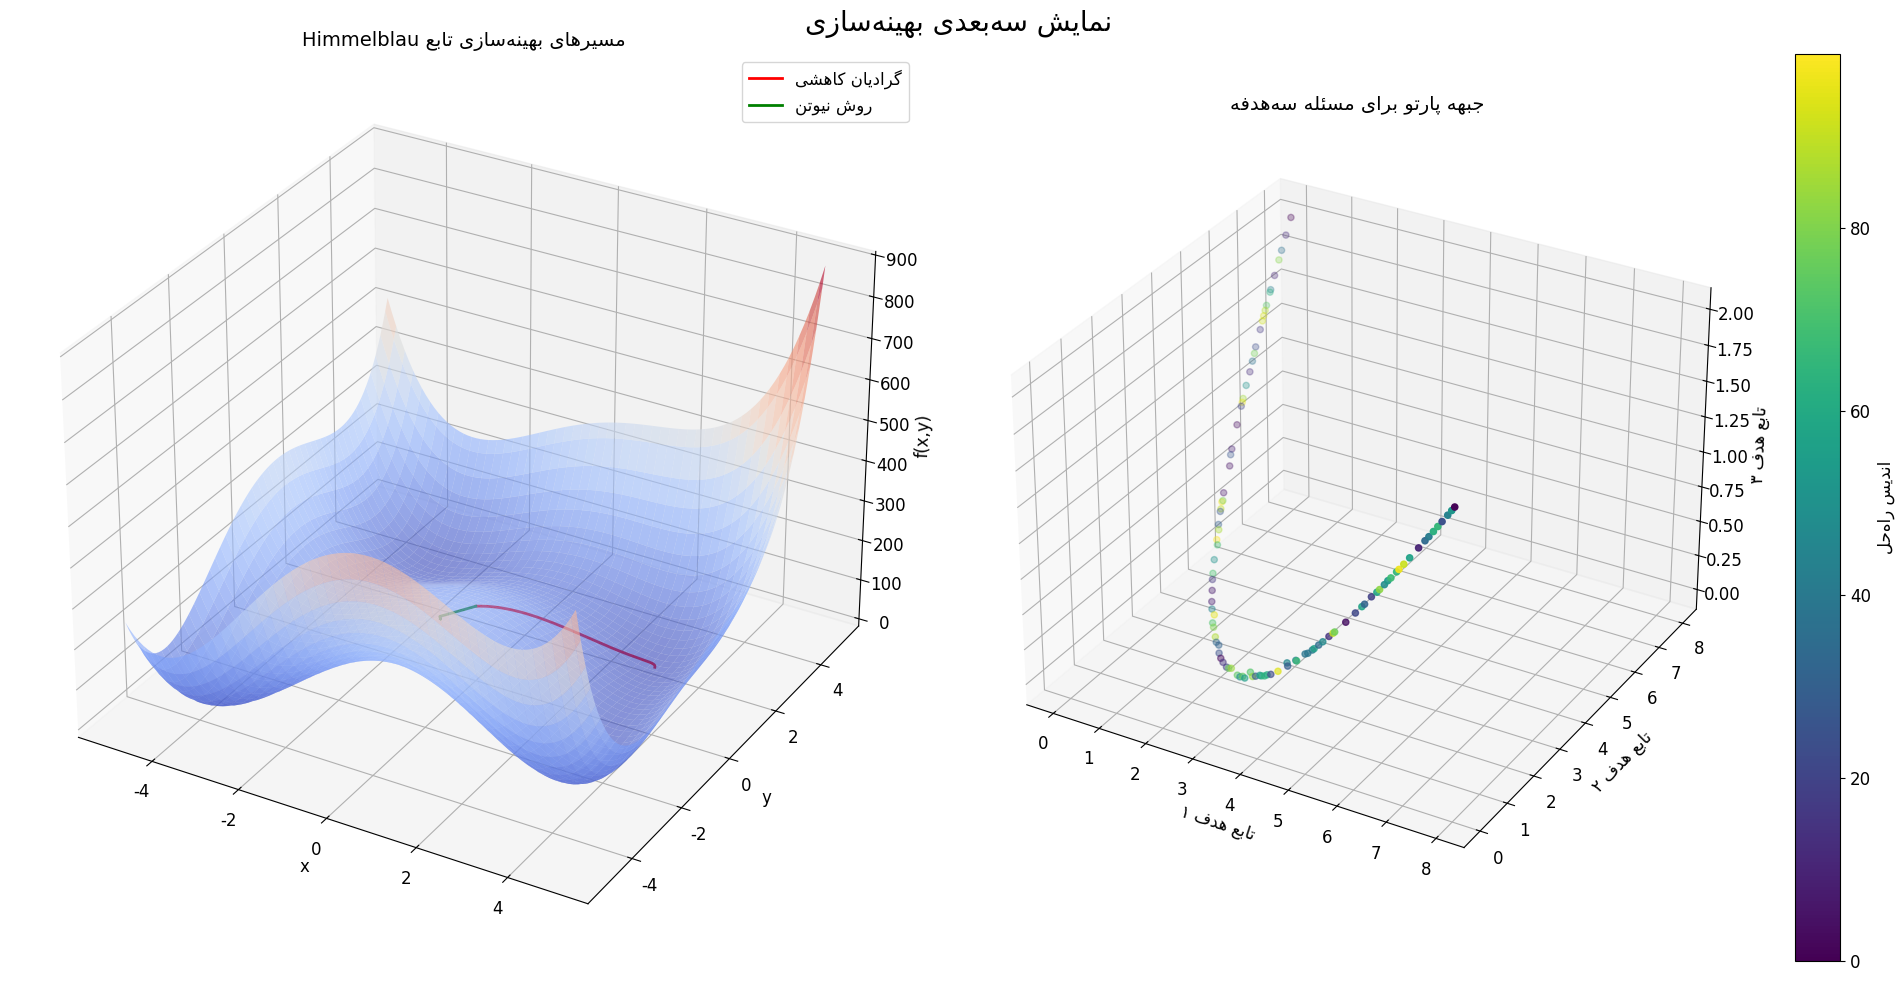

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize as minimize_moo
from scipy.optimize import minimize
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# =============================================================================
# بخش 1: بهینه‌سازی محدب دو متغیره (تابع Himmelblau)
# =============================================================================
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def himmelblau_grad(x):
    dx1 = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    dx2 = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([dx1, dx2])

def himmelblau_hess(x):
    d2x1 = 12*x[0]**2 + 4*x[1] - 42
    d2x2 = 12*x[1]**2 + 4*x[0] - 26
    dx1dx2 = 4*x[0] + 4*x[1]
    return np.array([[d2x1, dx1dx2], [dx1dx2, d2x2]])

# گرادیان کاهشی
def gradient_descent_2d(grad, x0, lr=0.001, max_iter=1000):
    x = x0.copy()
    path = [x0]
    for i in range(max_iter):
        g = grad(x)
        x = x - lr * g
        path.append(x)
    return np.array(path)

# روش نیوتن
def newton_method_2d(grad, hess, x0, max_iter=10):
    x = x0.copy()
    path = [x0]
    for i in range(max_iter):
        g = grad(x)
        H = hess(x)
        try:
            dx = np.linalg.solve(H, -g)
        except np.linalg.LinAlgError:
            dx = -g
        x = x + dx
        path.append(x)
    return np.array(path)

# اجرا
x0 = np.array([0.0, 0.0])
gd_path = gradient_descent_2d(himmelblau_grad, x0, lr=0.001, max_iter=1000)
newton_path = newton_method_2d(himmelblau_grad, himmelblau_hess, x0, max_iter=10)

# =============================================================================
# بخش 2: بهینه‌سازی چندهدفه سه‌بعدی
# =============================================================================
class MultiObjectiveProblem3D(Problem):
    def __init__(self):
        super().__init__(n_var=2, n_obj=3, n_constr=0, xl=-5.0, xu=5.0)

    def _evaluate(self, X, out, *args, **kwargs):
        f1 = np.sum((X - 1)**2, axis=1)
        f2 = np.sum((X + 1)**2, axis=1)
        f3 = np.sum(X**2, axis=1)
        out["F"] = np.column_stack([f1, f2, f3])

# حل با NSGA-II
problem = MultiObjectiveProblem3D()
algorithm = NSGA2(pop_size=100)
res = minimize_moo(problem, algorithm, ('n_gen', 100), seed=1, verbose=False)
F = res.F
X = res.X

# =============================================================================
# ترسیم نمودارهای سه‌بعدی
# =============================================================================
fig = plt.figure(figsize=(20, 10))

# نمودار 1: تابع Himmelblau و مسیر بهینه‌سازی
ax1 = fig.add_subplot(121, projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X_vals, Y_vals = np.meshgrid(x, y)
Z_vals = np.zeros_like(X_vals)
for i in range(X_vals.shape[0]):
    for j in range(X_vals.shape[1]):
        Z_vals[i,j] = himmelblau([X_vals[i,j], Y_vals[i,j]])

# سطح تابع
ax1.plot_surface(X_vals, Y_vals, Z_vals, cmap=cm.coolwarm, alpha=0.6)
# مسیر گرادیان کاهشی
ax1.plot(gd_path[:,0], gd_path[:,1], [himmelblau(p) for p in gd_path], 'r-', linewidth=2, label=persian_text('گرادیان کاهشی'))
# مسیر نیوتن
ax1.plot(newton_path[:,0], newton_path[:,1], [himmelblau(p) for p in newton_path], 'g-', linewidth=2, label=persian_text('روش نیوتن'))
ax1.set_xlabel(persian_text('x'))
ax1.set_ylabel(persian_text('y'))
ax1.set_zlabel(persian_text('f(x,y)'))
ax1.set_title(persian_text('مسیرهای بهینه‌سازی تابع Himmelblau'), fontsize=14)
ax1.legend()

# نمودار 2: جبهه پارتو سه‌بعدی
ax2 = fig.add_subplot(122, projection='3d')
sc = ax2.scatter(F[:,0], F[:,1], F[:,2], c=np.arange(len(F)), cmap=cm.viridis, s=20)
ax2.set_xlabel(persian_text('تابع هدف ۱'))
ax2.set_ylabel(persian_text('تابع هدف ۲'))
ax2.set_zlabel(persian_text('تابع هدف ۳'))
ax2.set_title(persian_text('جبهه پارتو برای مسئله سه‌هدفه'), fontsize=14)
fig.colorbar(sc, ax=ax2, label=persian_text('اندیس راه‌حل'))

# تنظیمات کلی
plt.suptitle(persian_text('نمایش سه‌بعدی بهینه‌سازی'), fontsize=20)
plt.tight_layout()
plt.savefig('3d_optimization.png', dpi=300)
plt.show()

In [ ]:
!pip install SALib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 13.0 MB/s eta 0:00:00


/tmp/ipython-input-17-364812195.py:77: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, N, calc_second_order=True)
/usr/local/lib/python3.11/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


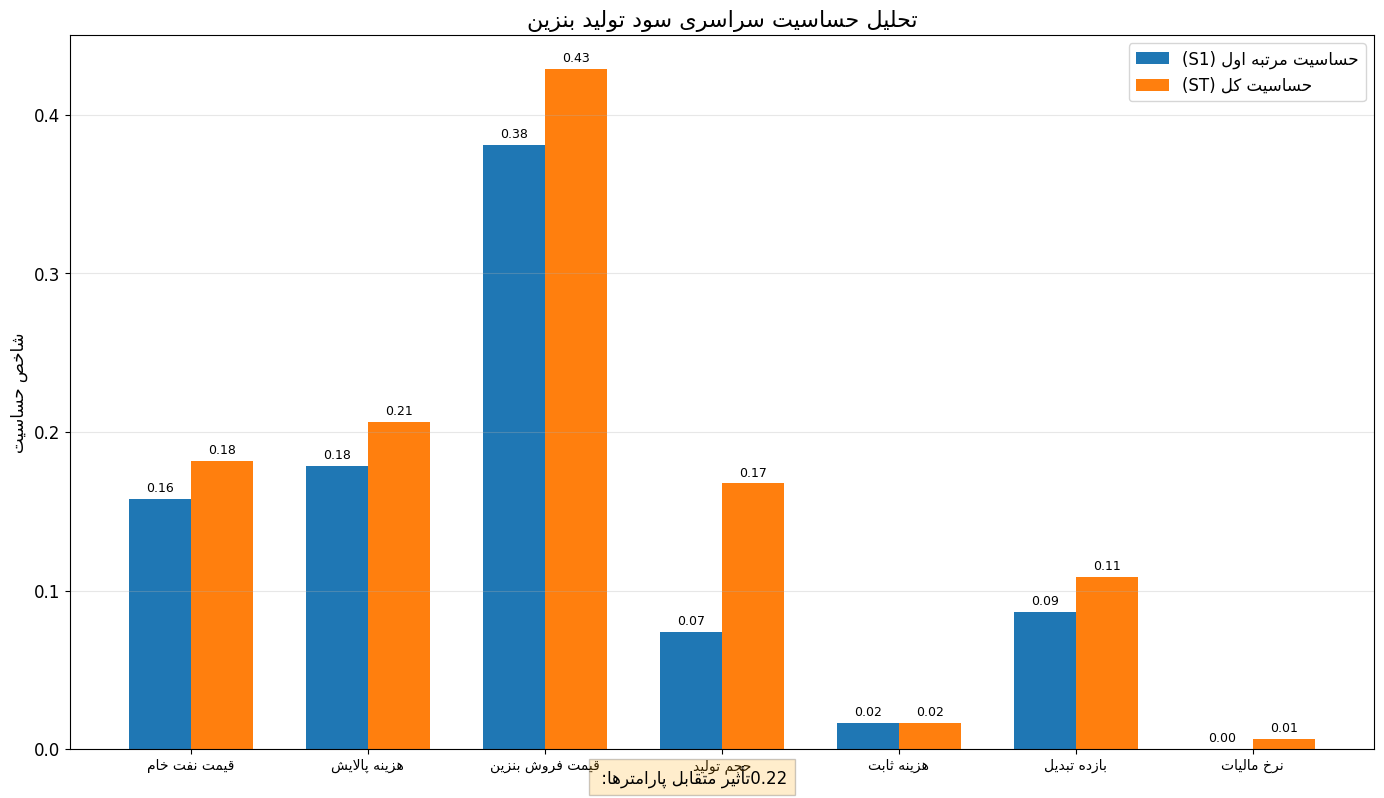

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# =============================================================================
# مدل سود تولید بنزین
# =============================================================================
def refinery_profit(params):
    """
    محاسبه سود تولید بنزین بر اساس پارامترهای ورودی
    پارامترها:
    - قیمت نفت خام (دلار/بشکه)
    - هزینه پالایش (دلار/لیتر)
    - قیمت فروش بنزین (دلار/لیتر)
    - حجم تولید (لیتر/روز)
    - هزینه ثابت (دلار/روز)
    - بازده تبدیل (%)
    - نرخ مالیات (%)
    """
    crude_price, refining_cost, selling_price, production_volume, fixed_cost, conversion_yield, tax_rate = params

    # محاسبه درآمد
    revenue = selling_price * production_volume * (conversion_yield / 100)

    # محاسبه هزینه‌ها
    crude_cost = (crude_price / 159) * production_volume  # تبدیل بشکه به لیتر
    variable_cost = refining_cost * production_volume
    total_cost = crude_cost + variable_cost + fixed_cost

    # محاسبه سود قبل از مالیات
    profit_before_tax = revenue - total_cost

    # محاسبه سود پس از مالیات
    profit = profit_before_tax * (1 - tax_rate / 100)

    return profit

# =============================================================================
# تحلیل حساسیت سراسری (روش Sobol)
# =============================================================================
# تعریف پارامترهای ورودی و محدوده تغییرات
problem = {
    'num_vars': 7,
    'names': [
        'crude_price',
        'refining_cost',
        'selling_price',
        'production_volume',
        'fixed_cost',
        'conversion_yield',
        'tax_rate'
    ],
    'bounds': [
        [40, 100],    # قیمت نفت خام (دلار/بشکه)
        [0.1, 0.5],   # هزینه پالایش (دلار/لیتر)
        [0.8, 1.5],   # قیمت فروش بنزین (دلار/لیتر)
        [500000, 2000000],  # حجم تولید (لیتر/روز)
        [50000, 200000],    # هزینه ثابت (دلار/روز)
        [70, 95],      # بازده تبدیل (%)
        [10, 30]       # نرخ مالیات (%)
    ]
}

# تولید نمونه‌ها با روش Saltelli
N = 1000
param_values = saltelli.sample(problem, N, calc_second_order=True)

# ارزیابی مدل برای تمام نمونه‌ها
Y = np.array([refinery_profit(vals) for vals in param_values])

# محاسبه شاخص‌های Sobol
Si = sobol.analyze(problem, Y, print_to_console=False)

# =============================================================================
# ترسیم نتایج
# =============================================================================
# تبدیل نام پارامترها به فارسی
persian_names = [
    persian_text('قیمت نفت خام'),
    persian_text('هزینه پالایش'),
    persian_text('قیمت فروش بنزین'),
    persian_text('حجم تولید'),
    persian_text('هزینه ثابت'),
    persian_text('بازده تبدیل'),
    persian_text('نرخ مالیات')
]

# شاخص‌های حساسیت مرتبه اول
S1 = Si['S1']
# شاخص‌های حساسیت کل
ST = Si['ST']

# ترسیم نمودار
fig, ax = plt.subplots(figsize=(14, 8))

# موقعیت میله‌ها
x = np.arange(len(persian_names))

# رسم میله‌ها
width = 0.35
rects1 = ax.bar(x - width/2, S1, width, label=persian_text('حساسیت مرتبه اول (S1)'))
rects2 = ax.bar(x + width/2, ST, width, label=persian_text('حساسیت کل (ST)'))

# تنظیمات نمودار
ax.set_ylabel(persian_text('شاخص حساسیت'), fontsize=12)
ax.set_title(persian_text('تحلیل حساسیت سراسری سود تولید بنزین'), fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(persian_names, fontsize=10)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)

# افزودن مقادیر عددی روی میله‌ها
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# نمایش تأثیر متقابل
interaction_text = persian_text('تأثیر متقابل پارامترها: ') + f"{sum(ST) - sum(S1):.2f}"
plt.figtext(0.5, 0.01, interaction_text, ha='center', fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.savefig('refinery_sensitivity_analysis.png', dpi=300)
plt.show()

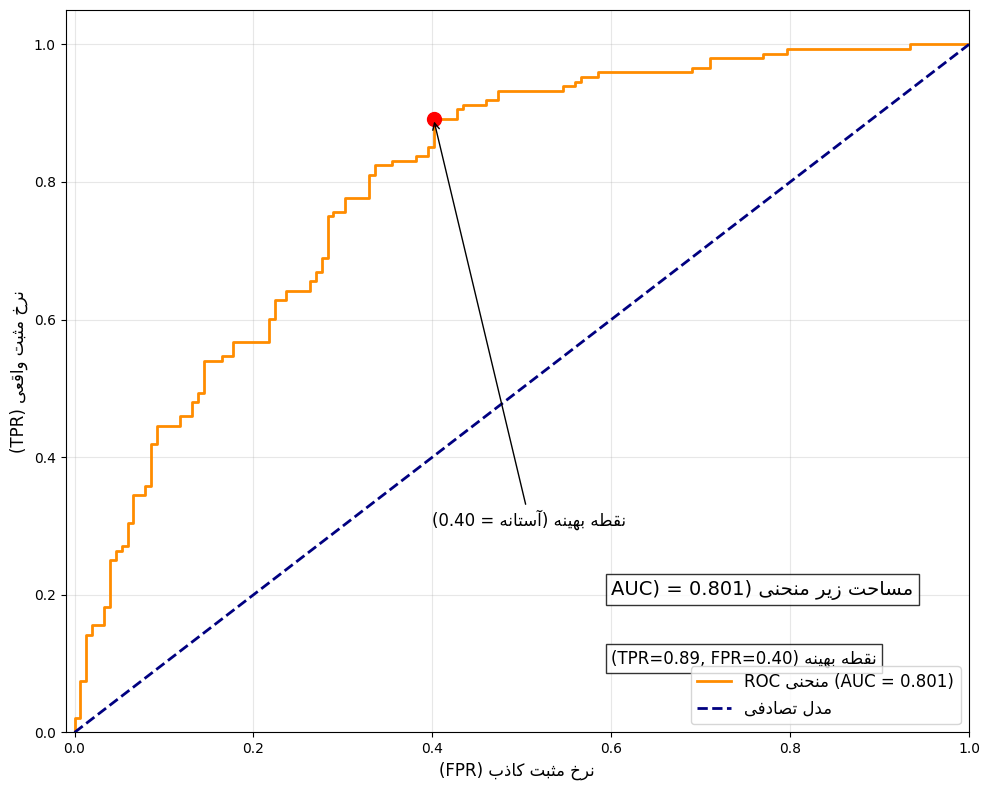

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# =============================================================================
# تولید داده‌های مصنوعی برای طبقه‌بندی دودویی
# =============================================================================
X, y = make_classification(
    n_samples=1000,  # تعداد نمونه‌ها
    n_features=20,   # تعداد ویژگی‌ها
    n_informative=8, # ویژگی‌های اطلاعاتی
    n_redundant=4,   # ویژگی‌های تکراری
    n_classes=2,     # تعداد کلاس‌ها
    random_state=42
)

# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =============================================================================
# آموزش مدل رگرسیون لجستیک
# =============================================================================
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی احتمالات برای داده آزمون
y_proba = model.predict_proba(X_test)[:, 1]  # احتمالات کلاس مثبت

# =============================================================================
# محاسبه معیارهای ROC و AUC
# =============================================================================
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# =============================================================================
# ترسیم منحنی ROC
# =============================================================================
plt.figure(figsize=(10, 8))

# رسم منحنی ROC
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'{persian_text("منحنی ROC")} (AUC = {roc_auc:.3f})')

# خط مبنا (تصادفی)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label=persian_text('مدل تصادفی'))

# تنظیمات نمودار
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(persian_text('نرخ مثبت کاذب (FPR)'), fontsize=12)
plt.ylabel(persian_text('نرخ مثبت واقعی (TPR)'), fontsize=12)
#plt.title(persian_text('منحنی مشخصه عملکرد گیرنده (ROC)'), fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)

# هایلایت نقطه بهینه (نزدیک به گوشه چپ بالا)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10)
plt.annotate(
    persian_text(f'نقطه بهینه (آستانه = {optimal_threshold:.2f})'),
    xy=(fpr[optimal_idx], tpr[optimal_idx]),
    xytext=(0.4, 0.3),
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    fontsize=12
)

# افزودن اطلاعات عملکرد مدل
plt.text(0.6, 0.2, persian_text(f'مساحت زیر منحنی (AUC) = {roc_auc:.3f}'),
         fontsize=14, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.6, 0.1, persian_text(f'نقطه بهینه (TPR={tpr[optimal_idx]:.2f}, FPR={fpr[optimal_idx]:.2f})'),
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# ذخیره و نمایش نمودار
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300)
plt.show()

In [ ]:
!pip install shap arabic_reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 6.7 MB/s eta 0:00:00


/tmp/ipython-input-5-1961097127.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = row[0]
/tmp/ipython-input-5-1961097127.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pressure = row[1]
/tmp/ipython-input-5-1961097127.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h2_ratio = row[2]
/tmp/ipython-input-5-1961097127.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

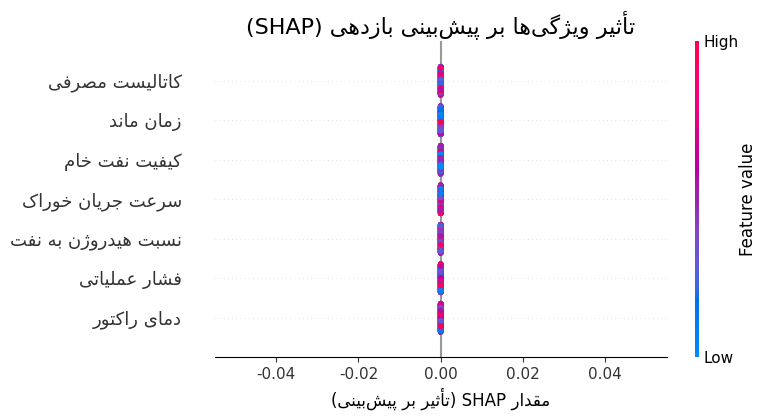

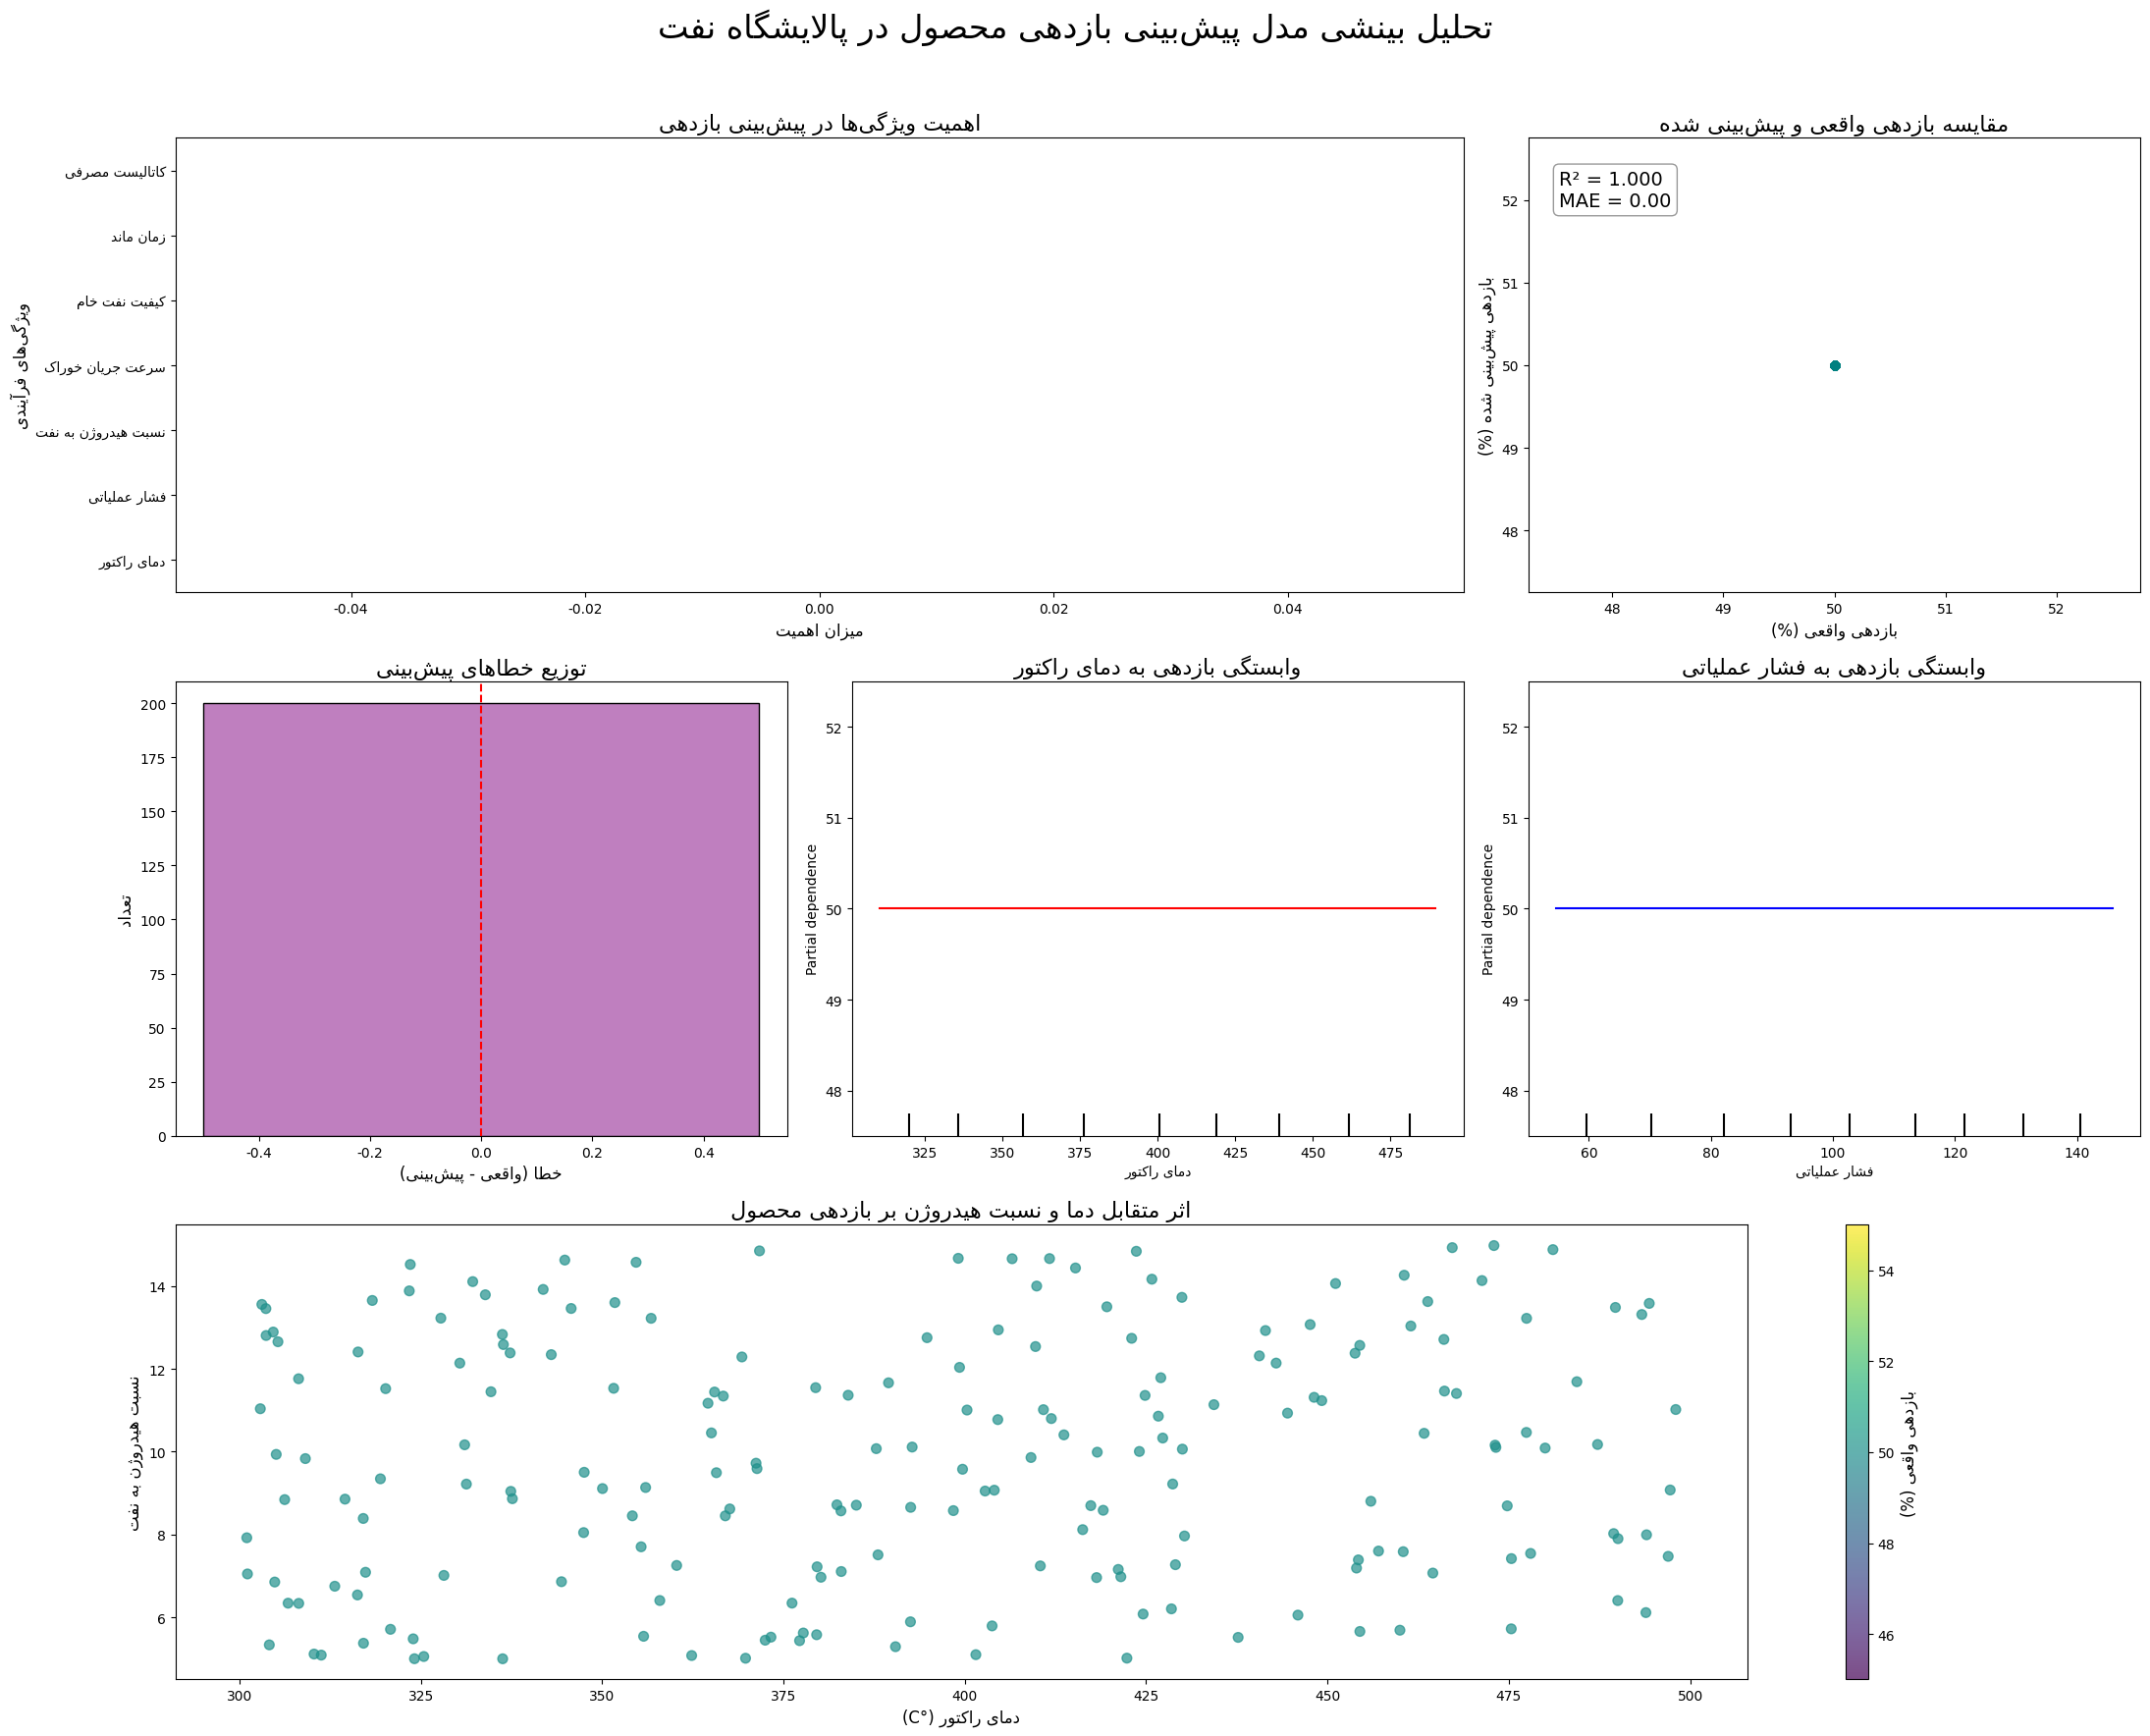

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import shap

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# =============================================================================
# تولید داده‌های مصنوعی برای پالایشگاه نفت
# =============================================================================
np.random.seed(42)
n_samples = 1000

# ویژگی‌های ورودی
data = {
    persian_text('دمای راکتور'): np.random.uniform(300, 500, n_samples),
    persian_text('فشار عملیاتی'): np.random.uniform(50, 150, n_samples),
    persian_text('نسبت هیدروژن به نفت'): np.random.uniform(5, 15, n_samples),
    persian_text('سرعت جریان خوراک'): np.random.uniform(1000, 5000, n_samples),
    persian_text('کیفیت نفت خام'): np.random.choice([1, 2, 3], n_samples, p=[0.3, 0.5, 0.2]),
    persian_text('زمان ماند'): np.random.uniform(0.5, 4.0, n_samples),
    persian_text('کاتالیست مصرفی'): np.random.uniform(0.5, 2.5, n_samples)
}

df = pd.DataFrame(data)

# محاسبه بازدهی محصول (هدف پیش‌بینی)
def calculate_yield(row):
    temp = row[0]
    pressure = row[1]
    h2_ratio = row[2]
    flow = row[3]
    quality = row[4]
    residence = row[5]
    catalyst = row[6]

    yield_value = (
        70 +
        0.1 * temp -
        0.05 * temp**2 +
        0.2 * pressure -
        0.001 * pressure**2 +
        1.5 * h2_ratio -
        0.05 * h2_ratio**2 +
        0.001 * flow -
        0.0000001 * flow**2 +
        2 * quality +
        5 * residence -
        0.5 * residence**2 +
        3 * catalyst
    )

    # افزودن نویز
    yield_value += np.random.normal(0, 3)

    return max(50, min(yield_value, 95))

df[persian_text('بازدهی محصول')] = df.apply(calculate_yield, axis=1)

# =============================================================================
# آموزش مدل پیش‌بینی
# =============================================================================
X = df.drop(persian_text('بازدهی محصول'), axis=1)
y = df[persian_text('بازدهی محصول')]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی‌ها
y_pred = model.predict(X_test)

# محاسبه معیارهای ارزیابی
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# =============================================================================
# ترسیم نمودارهای بینشی
# =============================================================================
fig = plt.figure(figsize=(22, 18))
fig.suptitle(persian_text('تحلیل بینشی مدل پیش‌بینی بازدهی محصول در پالایشگاه نفت'), fontsize=24, y=0.98)

# 1. اهمیت ویژگی‌ها
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='skyblue', ax=ax1)
ax1.set_title(persian_text('اهمیت ویژگی‌ها در پیش‌بینی بازدهی'), fontsize=16)
ax1.set_xlabel(persian_text('میزان اهمیت'), fontsize=12)
ax1.set_ylabel(persian_text('ویژگی‌های فرآیندی'), fontsize=12)

# 2. مقایسه مقادیر واقعی و پیش‌بینی شده
ax2 = plt.subplot2grid((3, 3), (0, 2))
ax2.scatter(y_test, y_pred, alpha=0.6, color='teal')
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax2.set_title(persian_text('مقایسه بازدهی واقعی و پیش‌بینی شده'), fontsize=16)
ax2.set_xlabel(persian_text('بازدهی واقعی (%)'), fontsize=12)
ax2.set_ylabel(persian_text('بازدهی پیش‌بینی شده (%)'), fontsize=12)
ax2.annotate(persian_text(f'R² = {r2:.3f}\nMAE = {mae:.2f}'),
             xy=(0.05, 0.85), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             fontsize=14)

# 3. توزیع خطاها
ax3 = plt.subplot2grid((3, 3), (1, 0))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple', ax=ax3)
ax3.axvline(0, color='r', linestyle='--')
ax3.set_title(persian_text('توزیع خطاهای پیش‌بینی'), fontsize=16)
ax3.set_xlabel(persian_text('خطا (واقعی - پیش‌بینی)'), fontsize=12)
ax3.set_ylabel(persian_text('تعداد'), fontsize=12)

# 4. تحلیل وابستگی جزئی (PDP)
ax4 = plt.subplot2grid((3, 3), (1, 1))
PartialDependenceDisplay.from_estimator(
    model, X_train, [persian_text('دمای راکتور')],
    ax=ax4, line_kw={"color": "red"}
)
ax4.set_title(persian_text('وابستگی بازدهی به دمای راکتور'), fontsize=16)
ax4.set_xlabel(persian_text('دمای راکتور (°C)'), fontsize=12)
ax4.set_ylabel(persian_text('بازدهی پیش‌بینی شده (%)'), fontsize=12)

# 5. تحلیل وابستگی جزئی برای فشار عملیاتی
ax5 = plt.subplot2grid((3, 3), (1, 2))
PartialDependenceDisplay.from_estimator(
    model, X_train, [persian_text('فشار عملیاتی')],
    ax=ax5, line_kw={"color": "blue"}
)
ax5.set_title(persian_text('وابستگی بازدهی به فشار عملیاتی'), fontsize=16)
ax5.set_xlabel(persian_text('فشار عملیاتی (bar)'), fontsize=12)
ax5.set_ylabel(persian_text('بازدهی پیش‌بینی شده (%)'), fontsize=12)

# 6. اثر متقابل ویژگی‌ها
ax6 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
scatter = ax6.scatter(
    X_test[persian_text('دمای راکتور')],
    X_test[persian_text('نسبت هیدروژن به نفت')],
    c=y_test,
    cmap='viridis',
    s=50,
    alpha=0.7
)
ax6.set_title(persian_text('اثر متقابل دما و نسبت هیدروژن بر بازدهی محصول'), fontsize=16)
ax6.set_xlabel(persian_text('دمای راکتور (°C)'), fontsize=12)
ax6.set_ylabel(persian_text('نسبت هیدروژن به نفت'), fontsize=12)
cbar = plt.colorbar(scatter, ax=ax6)
cbar.set_label(persian_text('بازدهی واقعی (%)'), fontsize=12)

# 7. تحلیل SHAP (قرار داده شده در جای مناسب)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# =============================================================================
# تحلیل SHAP جداگانه
# =============================================================================
# آموزش مدل SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# نمودار خلاصه SHAP
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train, show=False)
plt.title(persian_text('تأثیر ویژگی‌ها بر پیش‌بینی بازدهی (SHAP)'), fontsize=16)
plt.xlabel(persian_text('مقدار SHAP (تأثیر بر پیش‌بینی)'), fontsize=12)
plt.tight_layout()
plt.savefig('shap_summary.png', dpi=300)

# ذخیره نمودار اصلی
plt.figure(fig.number)
plt.savefig('refinery_yield_insights.png', dpi=300)
plt.show()

In [ ]:
!pip install graphviz

In [ ]:
from graphviz import Digraph

# ایجاد نمودار جهت‌دار با تنظیمات حرفه‌ای
dot = Digraph(
    name='AI_in_Oil_Gas_Learning_Path',
    format='png',
    graph_attr={
        'rankdir': 'LR',
        'splines': 'ortho',
        'fontname': 'B Nazanin',
        'fontsize': '12',
        'bgcolor': '#f0f9ff',
        'margin': '0.5'
    },
    node_attr={
        'shape': 'box',
        'style': 'rounded,filled',
        'fillcolor': '#e6f7ff',
        'fontname': 'B Nazanin',
        'fontsize': '11',
        'height': '0.5',
        'width': '1.5'
    },
    edge_attr={'fontname': 'B Nazanin', 'fontsize': '10'}
)

# افزودن گره‌ها با جزئیات فنی
dot.node('A', 'شروع: داده‌های خام صنعتی\n(حسگرهای چاه، لاگ‌های حفاری، داده‌های لرزه‌نگاری)', shape='oval', fillcolor='#d4edda')
dot.node('B', 'گام ۱: گردآوری داده‌ها\n• پلتفرم‌ها: OSIsoft PI, Hadoop HDFS\n• پروتکل‌ها: WITSML, OPC UA', fillcolor='#fff3cd')
dot.node('C', 'گام ۲: پاک‌سازی و پیش‌پردازش\n• حذف نویز: فیلتر کالمن\n• پرکردن داده‌های گم‌شده: KNN Imputer\n• نرمال‌سازی: MinMaxScaler', fillcolor='#fff3cd')
dot.node('D', 'گام ۳: مهندسی ویژگی\n• ویژگی‌های زمانی: میانگین متحرک ۲۴h\n• تحلیل فرکانسی: FFT سیگنال‌ها\n• ترکیب داده‌های چندمنبعی', fillcolor='#fff3cd')
dot.node('E', 'گام ۴: انتخاب الگوریتم\n• طبقه‌بندی: XGBoost/SVM\n• رگرسیون: LSTM/Prophet\n• تشخیص ناهنجاری: Autoencoders', fillcolor='#fff3cd')
dot.node('F', 'گام ۵: آموزش مدل\n• تقسیم داده: 60/20/20\n• اعتبارسنجی: K-Fold CV\n• بهینه‌سازی: Bayesian Optimization', fillcolor='#fff3cd')
dot.node('G', 'گام ۶: ارزیابی و بهینه‌سازی\n• سنجه‌ها: RMSE/F1-Score/MAPE\n• تفسیرپذیری: SHAP/LIME\n• تست مقاومت داده‌های پرت', fillcolor='#fff3cd')
dot.node('H', 'گام ۷: استقرار عملیاتی\n• کانتینری‌سازی: Docker\n• استقرار Edge: Azure IoT\n• یکپارچه‌سازی: Modbus/OPC UA', fillcolor='#fff3cd')
dot.node('I', 'پایان: تصمیم‌گیری عملیاتی\n• پیش‌بینی تولید روزانه\n• هشدار خرابی تجهیزات\n• بهینه‌سازی مصرف انرژی', shape='oval', fillcolor='#d4edda')

# افزودن لبه‌ها با جزئیات
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI'])

# افزودن زیرگره‌ها و ارتباطات
with dot.subgraph(name='cluster_0') as c:
    c.attr(label='ابزارهای پشتیبانی', style='dashed', fontname='B Nazanin')
    c.node('QR', 'لینک‌های کمکی:\n• نوت‌بوک‌های Google Colab\n• دیتاست‌های صنعتی\n• شبیه‌سازهای وب', shape='note', fillcolor='#e8f4f8')
    c.node('CODE', 'نمونه کد پایتون:\n• پیش‌پردازش داده‌های چاه\n• آموزش مدل LSTM\n• شبیه‌سازی SCADA', shape='note', fillcolor='#e8f4f8')

dot.edge('B', 'QR', label='دسترسی سریع', style='dashed')
dot.edge('C', 'CODE', label='مثال عملی', style='dashed')

# افزودن جدول منابع داده
dot.node('DATA_TABLE', '''<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
    <TR><TD COLSPAN="4"><B>دیتاست‌های پیشنهادی</B></TD></TR>
    <TR><TD><B>حسگر</B></TD><TD><B>دامنه</B></TD><TD><B>فرکانس</B></TD><TD><B>کاربرد</B></TD></TR>
    <TR><TD>PT-101</TD><TD>0-5000 psi</TD><TD>1 Hz</TD><TD>فشار خط لوله</TD></TR>
    <TR><TD>TT-205</TD><TD>-50°C تا 300°C</TD><TD>0.5 Hz</TD><TD>دمای ریاکتور</TD></TR>
    <TR><TD>VI-310</TD><TD>0-10 mm/s</TD><TD>2 kHz</TD><TD>تشخیص خرابی پمپ</TD></TR>
</TABLE>>''', shape='plaintext')

dot.edge('A', 'DATA_TABLE', style='invis')  # اتصال نامرئی برای موقعیت‌دهی

# تنظیم چیدمان
dot.attr(rank='same; A, DATA_TABLE')
dot.attr(rank='same; QR, CODE')

# تولید خروجی
dot.render('AI_in_Oil_Gas_Learning_Path', format='png', cleanup=True)
print("فلوچارت با موفقیت ایجاد شد. فایل خروجی: AI_in_Oil_Gas_Learning_Path.png")

فلوچارت با موفقیت ایجاد شد. فایل خروجی: AI_in_Oil_Gas_Learning_Path.png


In [ ]:
%%capture
!pip install graphviz pydot
!apt-get install -y fonts-nanum* fonts-noto-cjk

# کتابخانه‌های مورد نیاز
from graphviz import Digraph
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import pydot

# تنظیم فونت برای پشتیبانی از فارسی
import matplotlib as mpl
mpl.rcParams['font.family'] = 'B Nazanin'
mpl.rcParams['axes.unicode_minus'] = False

def create_oil_gas_flowchart():
    # ایجاد نمودار
    dot = Digraph(
        name='AI_in_Oil_Gas_Learning_Path',
        format='png',
        graph_attr={
            'rankdir': 'TB',
            'splines': 'ortho',
            'fontname': 'Noto Sans Arabic',
            'fontsize': '10',
            'bgcolor': '#f0f9ff',
            'margin': '0.5',
            'label': 'مسیر یادگیری خودمحور: هوش مصنوعی در صنعت نفت و گاز',
            'labelloc': 't'
        },
        node_attr={
            'shape': 'box',
            'style': 'rounded,filled',
            'fillcolor': '#e6f7ff',
            'fontname': 'Noto Sans Arabic',
            'fontsize': '9',
            'height': '0.4',
            'width': '1.2'
        },
        edge_attr={'fontname': 'Noto Sans Arabic', 'fontsize': '8'}
    )

    # افزودن گره‌ها با جزئیات فنی
    dot.node('A', 'شروع: داده‌های خام صنعتی\n• حسگرهای چاه‌ها\n• لاگ‌های حفاری\n• داده‌های لرزه‌نگاری', shape='oval', fillcolor='#d4edda')
    dot.node('B', 'گام ۱: گردآوری داده‌ها\n• پلتفرم‌ها: OSIsoft PI, Hadoop\n• پروتکل‌ها: WITSML, OPC UA', fillcolor='#fff3cd')
    dot.node('C', 'گام ۲: پاک‌سازی و پیش‌پردازش\n• حذف نویز: فیلتر کالمن\n• پرکردن داده‌های گم‌شده\n• نرمال‌سازی: MinMaxScaler', fillcolor='#fff3cd')
    dot.node('D', 'گام ۳: مهندسی ویژگی\n• ویژگی‌های زمانی: میانگین متحرک\n• تحلیل فرکانسی: FFT\n• ترکیب داده‌های چندمنبعی', fillcolor='#fff3cd')
    dot.node('E', 'گام ۴: انتخاب الگوریتم\n• طبقه‌بندی: XGBoost/SVM\n• رگرسیون: LSTM/Prophet\n• تشخیص ناهنجاری', fillcolor='#fff3cd')
    dot.node('F', 'گام ۵: آموزش مدل\n• تقسیم داده: 60/20/20\n• اعتبارسنجی: K-Fold CV\n• بهینه‌سازی: GridSearch', fillcolor='#fff3cd')
    dot.node('G', 'گام ۶: ارزیابی و بهینه‌سازی\n• سنجه‌ها: RMSE/F1-Score\n• تفسیرپذیری: SHAP\n• تست مقاومت داده‌ها', fillcolor='#fff3cd')
    dot.node('H', 'گام ۷: استقرار عملیاتی\n• کانتینری‌سازی: Docker\n• استقرار Edge: Azure IoT\n• یکپارچه‌سازی: OPC UA', fillcolor='#fff3cd')
    dot.node('I', 'پایان: تصمیم‌گیری عملیاتی\n• پیش‌بینی تولید\n• هشدار خرابی تجهیزات\n• بهینه‌سازی انرژی', shape='oval', fillcolor='#d4edda')

    # افزودن لبه‌ها
    dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI'])

    # افزودن عناصر تعاملی
    dot.node('QR', 'دسترسی به منابع:\n• نوت‌بوک‌های Colab\n• دیتاست‌های صنعتی\n• شبیه‌سازهای وب', shape='note', fillcolor='#e8f4f8')
    dot.edge('B', 'QR', label='کدهای نمونه', style='dashed', color='#ff6b6b')

    dot.node('CODE', 'نمونه کد پایتون:\n• پیش‌پردازش داده‌های چاه\n• آموزش مدل LSTM\n• شبیه‌سازی SCADA', shape='note', fillcolor='#e8f4f8')
    dot.edge('C', 'CODE', label='پیاده‌سازی', style='dashed', color='#ff6b6b')

    # ایجاد و نمایش فلوچارت در حافظه
    png_bytes = dot.pipe(format='png')
    return png_bytes

# ایجاد و نمایش فلوچارت
flowchart_image = create_oil_gas_flowchart()

# نمایش در Colab
def display_flowchart_in_colab(image_bytes):
    # ذخیره موقت در حافظه
    from PIL import Image
    import io

    img = Image.open(io.BytesIO(image_bytes))
    plt.figure(figsize=(15, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.title('مسیر یادگیری خودمحور: هوش مصنوعی در صنعت نفت و گاز', fontsize=16, pad=20)
    plt.show()

# نمایش فلوچارت
display_flowchart_in_colab(flowchart_image)

# نمایش جدول داده‌های نمونه
import pandas as pd
from IPython.display import display as ipy_display

data_table = pd.DataFrame({
    'حسگر': ['PT-101', 'TT-205', 'VI-310'],
    'دامنه داده': ['0-5000 psi', '-50°C تا 300°C', '0-10 mm/s'],
    'فرکانس نمونه‌برداری': ['1 Hz', '0.5 Hz', '2 kHz'],
    'کاربرد': ['نظارت فشار خط لوله', 'کنترل دمای ریاکتور', 'تشخیص خرابی پمپ']
})

print("\n" + "="*80)
print("جدول دیتاست‌های پیشنهادی برای تمرین عملی")
print("="*80)
ipy_display(data_table.style.set_properties(**{
    'background-color': '#e8f4f8',
    'color': 'black',
    'border-color': 'white',
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#4a86e8'), ('color', 'white')]
}]))

In [ ]:
!pip install python-bidi arabic_reshaper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 5.6 MB/s eta 0:00:00


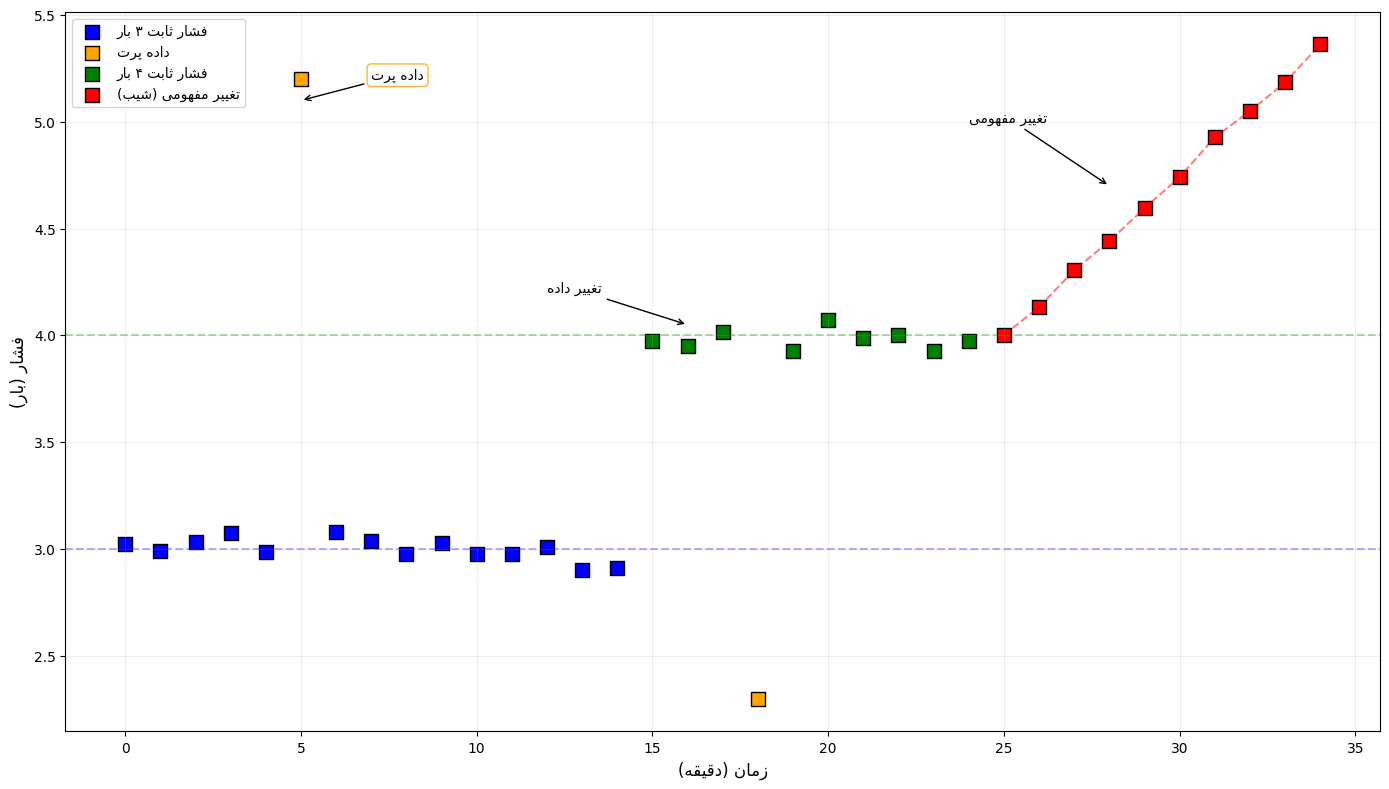

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# تولید داده‌ها
np.random.seed(42)
time = np.arange(0, 35)  # زمان از 0 تا 34

# ایجاد فشار با الگوهای مختلف
pressure = np.concatenate([
    # بخش اول: فشار ثابت در 3 بار با نوسان کم
    np.random.normal(3.0, 0.05, 15),

    # بخش دوم: فشار ثابت در 4 بار با نوسان کم
    np.random.normal(4.0, 0.05, 10),

    # بخش سوم: تغییر مفهومی (شیب افزایشی)
    4.0 + 0.15 * (np.arange(0, 10) + np.random.normal(0, 0.1, 10))
])

# افزودن داده‌های پرت
pressure[5] = 5.2   # داده پرت در بخش اول
pressure[18] = 2.3  # داده پرت در بخش دوم

# تعریف رنگ‌ها و دسته‌ها
colors = []
categories = []
for i in range(len(time)):
    if i < 15:
        colors.append('blue')
        categories.append(persian_text('فشار ثابت ۳ بار'))
    elif i < 25:
        colors.append('green')
        categories.append(persian_text('فشار ثابت ۴ بار'))
    else:
        colors.append('red')
        categories.append(persian_text('تغییر مفهومی (شیب)'))

# مشخص کردن داده‌های پرت
outliers = [5, 18]
for i in outliers:
    colors[i] = 'orange'
    if i < 15:
        categories[i] = persian_text('داده پرت')
    else:
        categories[i] = persian_text('داده پرت')

# ایجاد نمودار
plt.figure(figsize=(14, 8))

# رسم نقاط با شکل مکعب
for i in range(len(time)):
    plt.scatter(time[i], pressure[i],
                marker='s', s=100,
                c=colors[i],
                edgecolor='black',
                label=categories[i] if i in [0, 15, 25, 5, 18] else "")

# افزودن خطوط راهنما
plt.axhline(y=3.0, color='blue', linestyle='--', alpha=0.3)
plt.axhline(y=4.0, color='green', linestyle='--', alpha=0.3)

# افزودن خط روند برای بخش شیب دار
slope_x = time[25:]
slope_y = pressure[25:]
plt.plot(slope_x, slope_y, 'r--', alpha=0.5)

# تنظیمات نمودار
#plt.title(persian_text('تحلیل رفتار فشار بر حسب زمان'), fontsize=16)
plt.xlabel(persian_text('زمان (دقیقه)'), fontsize=12)
plt.ylabel(persian_text('فشار (بار)'), fontsize=12)
plt.grid(alpha=0.2)

# ایجاد راهنما
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(
    unique_labels.values(),
    unique_labels.keys(),
    loc='upper left',
    fontsize=10
)

# افزودن توضیحات
#plt.annotate(persian_text('نوسانات کم حول فشار ۳ بار'),
  #           xy=(7, 3.05), xytext=(2, 3.5),
  #           arrowprops=dict(facecolor='blue', arrowstyle='->'),
   #          fontsize=10)

plt.annotate(persian_text('تغییر داده'),
             xy=(16, 4.05), xytext=(12, 4.2),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10)

plt.annotate(persian_text('تغییر مفهومی'),
             xy=(28, 4.7), xytext=(24, 5),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.annotate(persian_text('داده پرت'),
             xy=(5, 5.1), xytext=(7, 5.2),
             arrowprops=dict(facecolor='orange', arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="orange", alpha=0.8))

# ذخیره و نمایش نمودار
plt.tight_layout()
plt.savefig('pressure_time_scatter.png', dpi=300)
plt.show()

In [ ]:
!pip install qrcode[pil]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00


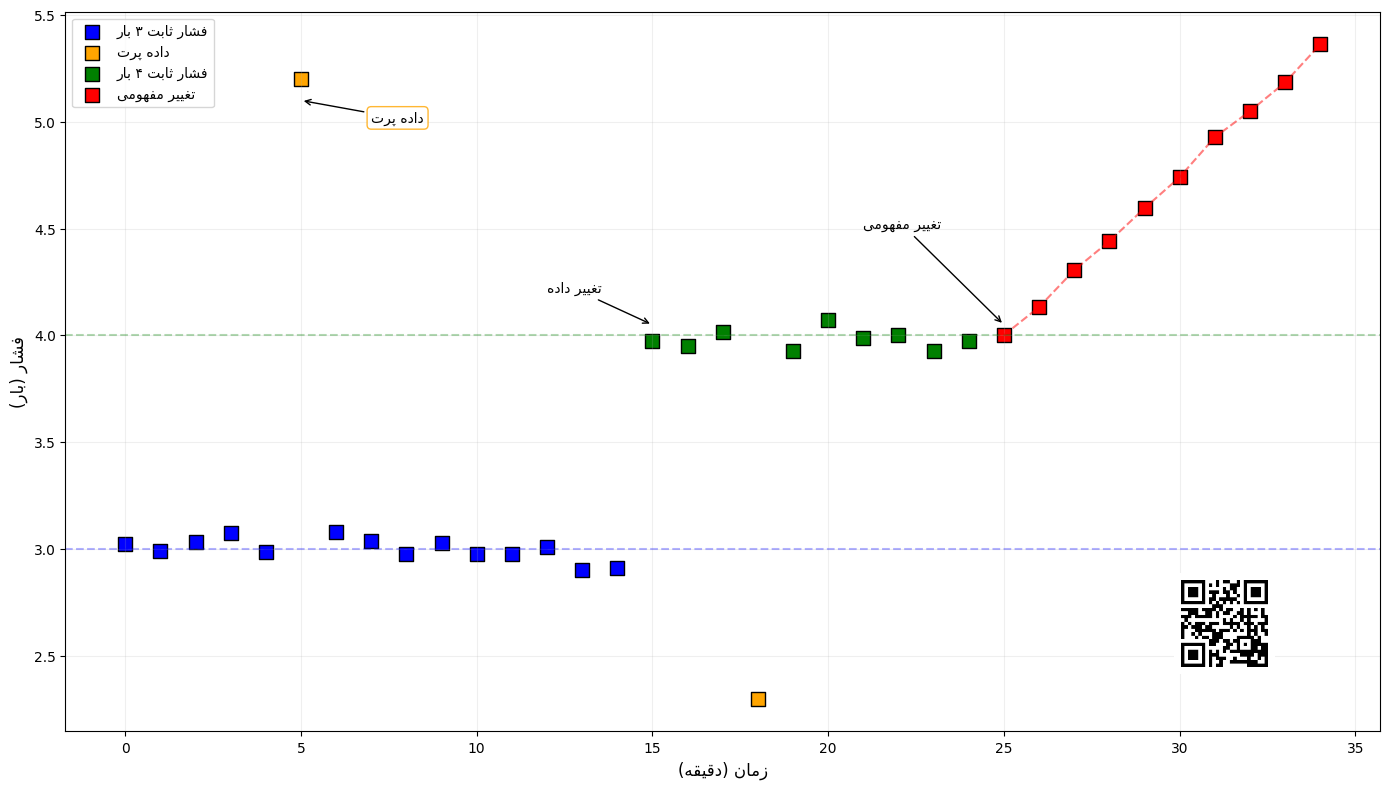

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import qrcode
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# تنظیمات فارسی‌نویسی
plt.rcParams["font.family"] = "B Nazanin"
plt.rcParams["axes.unicode_minus"] = False

def persian_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# تولید داده‌ها
np.random.seed(42)
time = np.arange(0, 35)  # زمان از 0 تا 34

# ایجاد فشار با الگوهای مختلف
pressure = np.concatenate([
    # بخش اول: فشار ثابت در 3 بار با نوسان کم
    np.random.normal(3.0, 0.05, 15),

    # بخش دوم: فشار ثابت در 4 بار با نوسان کم
    np.random.normal(4.0, 0.05, 10),

    # بخش سوم: تغییر مفهومی (شیب افزایشی)
    4.0 + 0.15 * (np.arange(0, 10) + np.random.normal(0, 0.1, 10))
])

# افزودن داده‌های پرت
pressure[5] = 5.2   # داده پرت در بخش اول
pressure[18] = 2.3  # داده پرت در بخش دوم

# تعریف رنگ‌ها و دسته‌ها
colors = []
categories = []
for i in range(len(time)):
    if i < 15:
        colors.append('blue')
        categories.append(persian_text('فشار ثابت ۳ بار'))
    elif i < 25:
        colors.append('green')
        categories.append(persian_text('فشار ثابت ۴ بار'))
    else:
        colors.append('red')
        categories.append(persian_text('تغییر مفهومی'))

# مشخص کردن داده‌های پرت
outliers = [5, 18]
for i in outliers:
    colors[i] = 'orange'
    if i < 15:
        categories[i] = persian_text('داده پرت')
    else:
        categories[i] = persian_text('داده پرت')

# ایجاد نمودار
fig, ax = plt.subplots(figsize=(14, 8))

# رسم نقاط با شکل مکعب
for i in range(len(time)):
    ax.scatter(time[i], pressure[i],
                marker='s', s=100,
                c=colors[i],
                edgecolor='black',
                label=categories[i] if i in [0, 15, 25, 5, 18] else "")

# افزودن خطوط راهنما
ax.axhline(y=3.0, color='blue', linestyle='--', alpha=0.3)
ax.axhline(y=4.0, color='green', linestyle='--', alpha=0.3)

# افزودن خط روند برای بخش شیب دار
slope_x = time[25:]
slope_y = pressure[25:]
ax.plot(slope_x, slope_y, 'r--', alpha=0.5)

# تنظیمات نمودار
#ax.set_title(persian_text('تحلیل رفتار فشار بر حسب زمان'), fontsize=16)
ax.set_xlabel(persian_text('زمان (دقیقه)'), fontsize=12)
ax.set_ylabel(persian_text('فشار (بار)'), fontsize=12)
ax.grid(alpha=0.2)

# ایجاد راهنما
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(
    unique_labels.values(),
    unique_labels.keys(),
    loc='upper left',
    fontsize=10
)

# افزودن توضیحات

ax.annotate(persian_text('تغییر داده'),
             xy=(15, 4.05), xytext=(12, 4.2),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10)

ax.annotate(persian_text('تغییر مفهومی'),
             xy=(25, 4.05), xytext=(21, 4.5),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

ax.annotate(persian_text('داده پرت'),
             xy=(5, 5.1), xytext=(7, 5),
             arrowprops=dict(facecolor='orange', arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="orange", alpha=0.8))

# =============================================================================
# ایجاد و اضافه کردن بارکد
# =============================================================================
# ایجاد بارکد برای لینک www.irib.ir
qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L,box_size=5, border=2)
qr.add_data("http://www.fajrjam.ir")
qr.make(fit=True)

# تبدیل بارکد به تصویر
img = qr.make_image(fill_color="black", back_color="white")
img = img.convert("RGBA")

# ذخیره موقت بارکد در حافظه
img_np = np.array(img)

# ایجاد جعبه برای بارکد
imagebox = OffsetImage(img_np, zoom=0.5)
ab = AnnotationBbox(imagebox, (0.92, 0.08),
                    xycoords='axes fraction',
                    box_alignment=(1, 0),
                    frameon=False,
                    pad=0)

# اضافه کردن بارکد به نمودار
ax.add_artist(ab)

# افزودن متن راهنما
#ax.text(0.92, 0.02, persian_text('اسکن بارکد با موبایل'),
#        transform=ax.transAxes, ha='center', fontsize=10,
 #       bbox=dict(facecolor='yellow', alpha=0.2))

# ذخیره و نمایش نمودار
plt.tight_layout()
plt.savefig('pressure_time_scatter_with_qr.png', dpi=300, bbox_inches='tight')
plt.show()